# Simulación Estocástica.
Autor: Rodrigo Alvarez Gaspar - 201895



## *Simulación estocástica.*

La simulación es ampliamente aceptada como un método eficaz para desarrollar predicciones, analizar riesgos, y representar de manera animada e ilustrativa la evolución de un sistema en diversas disciplinas. Cuando hay incertidumbre en el comportamiento de ciertos elementos del modelo de simulación, es necesario modelar estos elementos aleatorios mediante el uso de distribuciones de probabilidad y/o procesos estocásticos que se generan durante la simulación.

## *Contexto Historico*

La historia de la simulación estocástica tiene sus inicios en 1940, cuando John Von Neumann y Stanislaw Marcin Ulam abordaron problemas matemáticos vinculados a la física nuclear. En ese contexto, se enfrentaron a la dificultad de una solución analítica inabordable y la elevada complejidad experimental. Fue entonces que acuñaron el término "Análisis de Monte Carlo". Este concepto, ahora denominado Simulación Estocástica, implica resolver un problema determinista mediante la simulación computacional de un proceso estocástico cuyas características probabilísticas cumplen con las condiciones matemáticas del problema original. En términos más sencillos, utilizando una computadora, se recrean condiciones aleatorias para analizar una dinámica o fenómeno determinista específico, evaluando los resultados computacionales obtenidos.

## Programación Orientada a Objetos en Python: Clases y Métodos.
En términos fundamentales, una clase constituye una entidad que establece una serie de elementos que especifican tanto un estado (datos) como un comportamiento (operaciones sobre los datos que alteran su estado).

En contraste, un objeto representa una manifestación o instancia específica de una clase.


Una clase encapsula tanto datos como funcionalidad. Al definir una clase en Python, se genera simultáneamente un nuevo tipo (cabe recordar los tipos int, float, str, list, tuple, etc., todos ellos definidos en una clase).

La declaración de una clase en Python se lleva a cabo mediante la palabra reservada "class". El siguiente esquema visualiza los componentes principales que constituyen una clase.

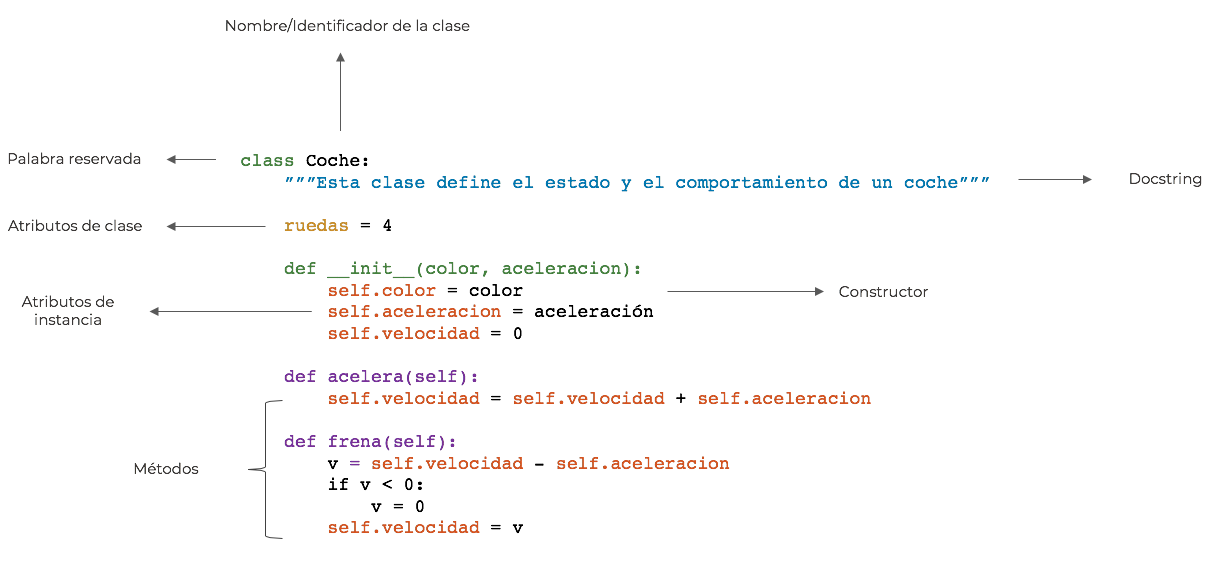

## **Generadores Congruenciales**
Un generador lineal congruencial (GLC) es un algoritmo que posibilita la obtención de una secuencia de números pseudoaleatorios mediante el cálculo de una función lineal definida en tramos discontinuos. La teoría que respalda este proceso es relativamente comprensible, la implementación del algoritmo en sí resulta sencilla y su ejecución es rápida, especialmente cuando la capacidad del hardware de la computadora permite llevar a cabo aritmética modular mediante la truncación del bit de almacenamiento correspondiente.

*Atributos Generales:*

1. Valor Inicial (semilla): Corresponde al valor inicial del generador y resulta fundamental para lograr la reproducibilidad de la secuencia.

2. Parámetros (a, c, m): Estos elementos definen las operaciones matemáticas aplicadas a la semilla. "a" es el multiplicador, "c" representa el incremento, y "m" es el módulo.

3. Ecuación de Recurrencia: La relación matemática que especifica la generación de números pseudoaleatorios. En el caso de un generador congruencial lineal, la fórmula adopta la forma: $$X_{n+1} = (a* X_n + c) mod(m)$$

4. Ciclo: Indica el número de valores únicos en la secuencia antes de que se inicie la repetición. Un generador ideal exhibe un ciclo completo.


*Propiedades de los Generadores Congruenciales:*
* Periodicidad larga: El periodo máximo indica el número de muestras que se pueden obtener antes de que la secuencia se repita.

* Simplicidad conceptual: Se busca lograr la generación de muestras de manera óptima en cuanto a velocidad, al mismo tiempo que se minimiza la cantidad de memoria necesaria para el funcionamiento del generador.

* Facilidad de implementación: Implica la capacidad de realizar la misma simulación de manera repetida, simplificando así las labores de depuración y verificación de los programas.

* Equidistribución:
Debe generar números que estén equidistribuidos de manera aproximadamente uniforme dentro del intervalo [0, 1].




*A continuación, se procede a cargar las bibliotecas que se emplearán en el contexto de esta documentación:*



In [ ]:
import numpy as np
import random as rd
import math
import matplotlib as plt
import scipy.stats as stats
import pandas as p

## Generador Lineal

####Multiplicativo
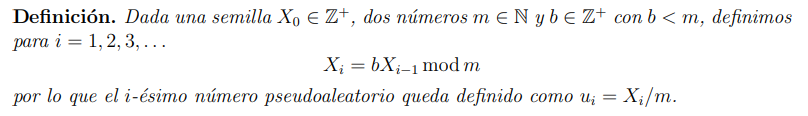

In [ ]:
class CongruencialMultiplicativo:
    def __init__(self, semilla, multiplicador, modulo):
        self.semilla = semilla
        self.multiplicador = multiplicador
        self.modulo = modulo

    def generar_numero_pseudoaleatorio(self):
        x = (self.multiplicador * self.semilla) % self.modulo
        self.semilla = x
        return x / self.modulo

    def generar_secuencia_pseudoaleatoria(self):
        numeros = []
        xi_anterior = self.semilla
        for i in range(self.modulo - 1):
            xi = (xi_anterior * self.multiplicador) % self.modulo
            if xi / self.modulo in numeros:
                break
            else:
                numeros.append(xi / self.modulo)
                xi_anterior = xi
        return numeros

generador_congruencial = CongruencialMultiplicativo(1, 3, 88)
print(generador_congruencial.generar_secuencia_pseudoaleatoria())


[0.03409090909090909, 0.10227272727272728, 0.3068181818181818, 0.9204545454545454, 0.7613636363636364, 0.2840909090909091, 0.8522727272727273, 0.5568181818181818, 0.6704545454545454, 0.011363636363636364]


### Generador aditivo
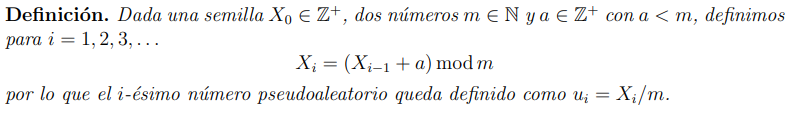

In [ ]:
class Congruencial_aditivo:
    def __init__(self, x0, b, m):
        self.x0 = x0
        self.b = b
        self.m = m
        self.x00 = x0

    def random(self):
        xi = (self.x0 + self.b) % self.m
        self.x0 = xi
        return xi/self.m

    def randoms(self):
        nums = []
        xi_anterior = self.x00
        for i in range(self.m - 1):
            xi = (xi_anterior + self.b) % self.m
            if xi/self.m in nums: break
            else:
                nums.append(xi/self.m)
                xi_anterior = xi
        return nums

generador_aditivo = Congruencial_aditivo(1,3,88)
print(generador_aditivo.randoms())

[0.045454545454545456, 0.07954545454545454, 0.11363636363636363, 0.14772727272727273, 0.18181818181818182, 0.2159090909090909, 0.25, 0.2840909090909091, 0.3181818181818182, 0.3522727272727273, 0.38636363636363635, 0.42045454545454547, 0.45454545454545453, 0.48863636363636365, 0.5227272727272727, 0.5568181818181818, 0.5909090909090909, 0.625, 0.6590909090909091, 0.6931818181818182, 0.7272727272727273, 0.7613636363636364, 0.7954545454545454, 0.8295454545454546, 0.8636363636363636, 0.8977272727272727, 0.9318181818181818, 0.9659090909090909, 0.0, 0.03409090909090909, 0.06818181818181818, 0.10227272727272728, 0.13636363636363635, 0.17045454545454544, 0.20454545454545456, 0.23863636363636365, 0.2727272727272727, 0.3068181818181818, 0.3409090909090909, 0.375, 0.4090909090909091, 0.4431818181818182, 0.4772727272727273, 0.5113636363636364, 0.5454545454545454, 0.5795454545454546, 0.6136363636363636, 0.6477272727272727, 0.6818181818181818, 0.7159090909090909, 0.75, 0.7840909090909091, 0.818181818

## **Generador Lineal**
Este método se basa en una relación matemática lineal recurrente, donde cada número de la secuencia se calcula mediante una combinación lineal del número anterior, denominado "semilla". Podemos expresarlo como:
$$X_{n+1} = (a* X_n + c) mod(m)$$

**Sustendado por el siguiente bloque:**

In [ ]:
class GeneradorLineal:
    def __init__(self, semilla, multiplicador, modulo, adicional):
        self.semilla = semilla
        self.multiplicador = multiplicador
        self.modulo = modulo
        self.adicional = adicional

    def generar_numero_lineal(self):
        x = (self.multiplicador * self.semilla + self.adicional) % self.modulo
        self.semilla = x
        return x / self.modulo

    def generar_secuencia_lineal(self):
        secuencia = []
        xi_anterior = self.semilla

        for _ in range(self.modulo - 1):
            xi = (xi_anterior * self.multiplicador + self.adicional) % self.modulo

            if xi / self.modulo in secuencia:
                break
            else:
                secuencia.append(xi / self.modulo)
                xi_anterior = xi  # actualizando la x(i-1)

        return secuencia

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
generador_lineal = GeneradorLineal(1, 3, 88, 5)
print(generador_lineal.generar_secuencia_lineal())

[0.09090909090909091, 0.32954545454545453, 0.045454545454545456, 0.19318181818181818, 0.6363636363636364, 0.9659090909090909, 0.9545454545454546, 0.9204545454545454, 0.8181818181818182, 0.5113636363636364, 0.5909090909090909, 0.8295454545454546, 0.5454545454545454, 0.6931818181818182, 0.13636363636363635, 0.4659090909090909, 0.45454545454545453, 0.42045454545454547, 0.3181818181818182, 0.011363636363636364]


### Generador Polinomial
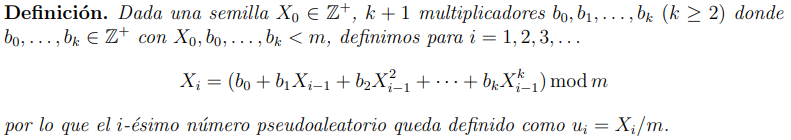

**Sustendado por el siguiente bloque:**

In [ ]:
class Congruencial_polinomial:
  def __init__(self, x0, b_s, m):
    self.x0 = x0
    self.b_s = np.array(b_s)
    self.m = m
    self.grado = len(b_s) - 1
    self.x00 = x0

  def random(self):
    x_s = np.array([self.x0**i for i in range(self.grado + 1)])
    xi = (np.dot(x_s, self.b_s)) % self.m
    self.x0 = xi
    return xi/self.m

  def randoms(self):
    nums = []
    xi_anterior = self.x00

    for i in range(self.m - 1):
        x_s = np.array([xi_anterior**i for i in range(self.grado + 1)])
        xi = (np.dot(x_s, self.b_s)) % self.m
        if xi/self.m in nums: break
        else:
            nums.append(xi/self.m)
            xi_anterior = xi


    return nums

Veamos la implementación de este generador, en el siguiente bloque de código:

In [ ]:
multiplicadores = [-1,0,0,0,0,1]
gen = Congruencial_polinomial(14,multiplicadores,15)
gen.randoms()

[0.8666666666666667,
 0.8,
 0.7333333333333333,
 0.6666666666666666,
 0.6,
 0.5333333333333333,
 0.4666666666666667,
 0.4,
 0.3333333333333333,
 0.26666666666666666,
 0.2,
 0.13333333333333333,
 0.06666666666666667,
 0.0]

## **Generador Congruencial Múltiple**
Utiliza múltiples ecuaciones de recurrencia simultáneamente para generar secuencias de números pseudoaleatorios. En lugar de depender de una única relación de recurrencia, el GCM emplea varias ecuaciones para calcular los valores sucesivos de la secuencia. Podemos expresarlo como:

$$X_{n+1} = (a_1X_{n1} + a_2X{n2} + *** + a_kX_{n,k}+c) mod(m)$$

El GCM es útil cuando se requiere generar múltiples secuencias pseudoaleatorias que están estadísticamente correlacionadas entre sí. Sin embargo, la elección adecuada de los parámetros, incluyendo los multiplicadores y los módulos, es fundamental para garantizar buenas propiedades estadísticas y evitar patrones no deseados en las secuencias generadas.

**Sustendado por el siguiente bloque:**

In [ ]:
def generador_congruencial_multiple(semillas, constantes, modulo, n):
    num_generadores = len(semillas)
    numeros_pseudoaleatorios = np.zeros((num_generadores, n))

    for i in range(num_generadores):
        semilla_actual = semillas[i]
        constante_actual = constantes[i]

        for j in range(n):
            semilla_actual = (constante_actual * semilla_actual) % modulo
            numeros_pseudoaleatorios[i, j] = semilla_actual / modulo

    return numeros_pseudoaleatorios

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
semillas = [123, 456, 789]  # Semillas iniciales para cada generador
constantes = [17, 29, 37]  # Constantes para cada generador
modulo = 1000  # Módulo para cada generador
n = 10  # Número de valores a generar

resultados = generador_congruencial_multiple(semillas, constantes, modulo, n)
resultados

array([[0.091, 0.547, 0.299, 0.083, 0.411, 0.987, 0.779, 0.243, 0.131,
        0.227],
       [0.224, 0.496, 0.384, 0.136, 0.944, 0.376, 0.904, 0.216, 0.264,
        0.656],
       [0.193, 0.141, 0.217, 0.029, 0.073, 0.701, 0.937, 0.669, 0.753,
        0.861]])

## **Generador Congruencial Lineal Combinado**

La ventaja principal del GCLC radica en su capacidad para producir secuencias pseudoaleatorias más robustas y con propiedades estadísticas mejoradas en comparación con un GCL individual. Sin embargo, es importante destacar que el diseño adecuado de un GCLC requiere un análisis detallado de las propiedades estadísticas de cada GCL individual y de la combinación utilizada.

El GCLC es utilizado en aplicaciones que demandan un alto nivel de aleatoriedad y uniformidad en las secuencias generadas, como simulaciones, experimentos numéricos y criptografía.

**Sustendado por el siguiente bloque:**

In [ ]:
def generador_congruencial_lineal_combinado(semillas, constantes, modulos, cantidad_numeros):
    num_generadores = len(semillas)
    numeros_generados = np.zeros((num_generadores, cantidad_numeros))

    for i in range(cantidad_numeros):
        for j in range(num_generadores):
            numeros_generados[j, i] = semillas[j] / modulos[j]
            semillas[j] = (constantes[j] * semillas[j]) % modulos[j]

    return numeros_generados

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
semillas = [123, 456, 789]  # Semillas iniciales
constantes = [1664525, 22695477, 1013904223]  # Constantes de congruencia
modulos = [232, 272, 332]  # Módulos

cantidad_numeros = 10  # Cantidad de números pseudoaleatorios a generar

resultados = generador_congruencial_lineal_combinado(semillas, constantes, modulos, cantidad_numeros)
print(resultados)

[[0.53017241 0.23706897 0.21982759 0.51293103 0.53017241 0.23706897
  0.21982759 0.51293103 0.53017241 0.23706897]
 [1.67647059 0.67647059 0.67647059 0.67647059 0.67647059 0.67647059
  0.67647059 0.67647059 0.67647059 0.67647059]
 [2.37650602 0.81626506 0.66566265 0.53915663 0.47289157 0.05722892
  0.26807229 0.04518072 0.73795181 0.71987952]]


## **Generador Congruencial Combinado Múltiple**

Es una extensión de los generadores congruenciales lineales simples que busca mejorar la calidad de las secuencias pseudoaleatorias generadas. En lugar de depender de un solo generador congruencial lineal, este enfoque combina varios generadores congruenciales lineales simples mediante operaciones aritméticas. Es decir,

$$X_{n+1} = (a_1X_{n1} + a_2X{n2} + *** + a_kX_{n,k}+c) mod(m)$$

Donde:
* $X_{n,1}, X_{n,2}, ... , X_{n,k}$ son las secuencias pseudoaleatorias generadas por los k generadores congruenciales lineales simples.
* $a_1, a_2 , ... , a_k$ son los multiplicadores asociados con cada generador.
* $c$ es un término constante conocido como el término aditivo.
* $m$ es el módulo que define la longitud del ciclo.

**Sustendado por el siguiente bloque:**

In [ ]:
def generador_congruencial_combinado_multiple(semillas, multiplicadores, modulos, n):
    num_generadores = len(semillas)
    numeros_pseudoaleatorios = np.zeros((num_generadores, n))

    for i in range(num_generadores):
        semilla_actual = semillas[i]
        multiplicador_actual = multiplicadores[i]
        modulo_actual = modulos[i]

        for j in range(n):
            semilla_actual = (multiplicador_actual * semilla_actual) % modulo_actual
            numeros_pseudoaleatorios[i, j] = semilla_actual / modulo_actual

    return numeros_pseudoaleatorios

def permutar_valores(numeros_pseudoaleatorios):
    num_generadores, n = numeros_pseudoaleatorios.shape
    numeros_ordenados = np.sort(numeros_pseudoaleatorios, axis=0)
    permutacion = np.random.permutation(n)
    numeros_aleatorios = numeros_ordenados[:, permutacion]

    return numeros_aleatorios

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
semillas = [123, 456, 789]  # Semillas iniciales para cada generador
multiplicadores = [1664525, 22695477, 1013904223]  # Multiplicadores para cada generador
modulos = [232, 272, 332]  # Módulos para cada generador
n = 5  # Número de valores a generar

resultados = generador_congruencial_combinado_multiple(semillas, multiplicadores, modulos, n)
print(resultados)

[[0.23706897 0.21982759 0.51293103 0.53017241 0.23706897]
 [0.67647059 0.67647059 0.67647059 0.67647059 0.67647059]
 [0.81626506 0.66566265 0.53915663 0.47289157 0.05722892]]


## **Generadores secuenciales**

Los generadores secuenciales son algoritmos diseñados para producir secuencias de valores en un orden específico y predecible.Un generador secuencial toma un valor inicial, conocido como "semilla", y utiliza una serie de operaciones matemáticas para producir una secuencia de números subsiguientes.

A continuación, se describe un procedimiento estándar aplicable a tres generadores, con ajustes particulares en la manipulación de bits destinada a la obtención de S1.

* Procedimiento Estándar  
        1.Inicialización de la Semilla
La semilla inicial se establece durante la instanciación del generador (por ejemplo, GSM4(7), GSM8(7), GSM16(7) en los ejemplos proporcionados).

        2.Generación de Bits
En cada iteración de la secuencia, se lleva a cabo una sucesión de divisiones y se almacenan los residuos. Esto se realiza mediante un bucle for que divide la semilla por 2 y registra el residuo en la lista "a".

        3.Manipulación para Obtener S1
La diferencia principal entre los generadores reside en la manipulación específica de algunos bits de la lista "a" para derivar el valor de S1. Esta operación varía en la cantidad y posición de los bits seleccionados, influyendo en la longitud y complejidad de la secuencia resultante.

        4.Actualización de la Semilla
La semilla se actualiza con el valor calculado (self.semilla = x) para el próximo elemento de la secuencia, permitiendo la continuación del bucle.

* Combinaciones Particulares.
  1. Combinación específica para GSM4 $$S_1 = a[0] + a[3]$$
  2. Combinación específica para GSM8 $$S_1 = a[0] + a[4] + a[5] + a[6]$$
  3. Combinación específica para GSM16 $$S_1 = a[0] + a[11] + a[13] + a[14]$$

##*Generador Secuencial de tamaño 4*
Algoritmo generador de secuencias que produce una secuencia de números utilizando una lógica específica basada en cuatro elementos clave.
  1. Combinación específica para GSM4 $$S_1 = a[0] + a[3]$$



**Sustendado por el siguiente bloque**

In [ ]:
class GeneradorSecuencialTamaño4:
    def __init__(self, semilla):
        self.semilla = semilla

    def generar_numero_pseudoaleatorio(self):
        if self.semilla >= 2 ** 4:
            raise ValueError("La semilla debe ser menor a {}".format(2 ** 4))

        bits = []
        for _ in range(4):
            residuo = self.semilla % 2
            cociente = self.semilla // 2
            bits.append(residuo)
            self.semilla = cociente

        bits.reverse()
        s1 = bits[0] + bits[3]
        nuevo_bit = s1 % 2
        del bits[0]
        bits.append(nuevo_bit)

        numero_generado = 0
        for i in range(len(bits)):
            numero_generado += bits[i] * 2 ** (len(bits) - (i + 1))
        self.semilla = numero_generado

        return numero_generado

    def generar_muestra(self, tamaño):
        if tamaño >= 2 ** 4:
            raise ValueError("No es posible generar una muestra de tamaño {}".format(tamaño))

        muestra = []
        for _ in range(tamaño):
            muestra.append(self.generar_numero_pseudoaleatorio())

        return muestra

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
generador_tamaño_4 = GeneradorSecuencialTamaño4(7)
muestra_generada = generador_tamaño_4.generar_muestra(15)
print(muestra_generada)

[15, 14, 13, 10, 5, 11, 6, 12, 9, 2, 4, 8, 1, 3, 7]


## *Generador Secuencial de Tamaño 8*
Este Generador Secuencial de Tamaño 8 utiliza una estrategia similar a la de un generador de tamaño 4 pero con una mayor complejidad debido a la manipulación de 8 bits. Es importante destacar que este tipo de generadores tiene limitaciones.

2. Combinación específica para GSM8 $$S_1=a[0]+a[4]+a[5]+a[6]$$

**Sustentado por el siguiente bloque**

In [ ]:
class GeneradorSecuencialTamañoS8:
    def __init__(self, seed):
        self.semilla = seed

    def rndm(self):
        if self.semilla >= 2 ** 8:
            print("Inserte una semilla menor a ", 2 ** 8)
        else:
            a = []
            for i in range(0, 8):
                r = self.semilla % 2
                q = self.semilla // 2
                a.append(r)
                self.semilla = q
            a.reverse()
            s1 = a[0] + a[4] + a[5] + a[6]
            b = s1 % 2
            del a[0]
            a.append(b)
            x = 0
            for i in range(0, len(a)):
                x += a[i] * 2 ** (len(a) - (i + 1))
            self.semilla = x
        return x

    def muestra(self, n):
        if n >= 2 ** 8:
            print("No es posible generar una muestra de tamaño: ", n)
        else:
            l = []
            for i in range(0, n):
                l.append(self.rndm())
            return l

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
# Ejemplo de uso
generador_tamaño_8 = GeneradorSecuencialTamañoS8(7)
muestra_generada = generador_tamaño_8.muestra(15)
print(muestra_generada)

[14, 29, 58, 116, 233, 210, 164, 72, 145, 35, 71, 142, 28, 56, 113]


## *Generador Secuencial de tamaño 16*
Sigue una estructura similar a los ejemplos anteriores, pero ahora opera con 16 bits, lo que le otorga mayor complejidad y diversidad en las secuencias generadas. Sin embargo, es crucial tener en cuenta que este tipo de generadores tiene limitaciones
  3. Combinación específica para GSM16 $$S_1 = a[0] + a[11] + a[13] + a[14]$$

**Sustentado por el siguiente bloque**

In [ ]:
class GeneradorSecuencialTamaño16:
    def __init__(self, seed):
        self.semilla = seed

    def rndm(self):
        if self.semilla >= 2 ** 16:
            print("Inserte una semilla menor a ", 2 ** 16)
        else:
            a = []
            for i in range(0, 16):
                r = self.semilla % 2
                q = self.semilla // 2
                a.append(r)
                self.semilla = q
            a.reverse()
            s1 = a[0] + a[11] + a[13] + a[14]
            b = s1 % 2
            del a[0]
            a.append(b)
            x = 0
            for i in range(0, len(a)):
                x += a[i] * 2 ** (len(a) - (i + 1))
            self.semilla = x
        return x

    def muestra(self, n):
        if n >= 2 ** 16:
            print("No es posible generar una muestra de tamaño: ", n)
        else:
            l = []
            for i in range(0, n):
                l.append(self.rndm())
            return l

**Veamos la implementación de este generador, en el siguiente bloque de código:**

In [ ]:
# Ejemplo de uso
generador_tamaño_16 = GeneradorSecuencialTamaño16(7)
muestra_generada = generador_tamaño_16.muestra(15)
print(muestra_generada)

[14, 28, 56, 113, 227, 455, 910, 1820, 3640, 7281, 14563, 29127, 58254, 50973, 36411]


## *Generador Multiply-With-Carry*
El Generador Multiply-With-Carry (MWC) es un tipo de generador de números pseudoaleatorios que utiliza operaciones de multiplicación y suma con acarreo para generar secuencias aparentemente aleatorias.

* Relación de Recurrencia:

  La relación de recurrencia típica de un generador MWC es $$X_{n+1} = a * X_n + c + carry$$
  Donde:  
  $a$ es un multiplicador   
  $X_n$ es el estado actual   
  $c$ término constante   
  $carry$ el acarreo de la suma anterior

* Caracteristicas:
  1. Multiplicación y Suma con Acarreo: Utiliza una combinación de operaciones de multiplicación y suma con acarreo para generar los números pseudoaleatorios.
  2. Implementación Simple: La implementación del algoritmo es relativamente simple, lo que facilita su comprensión y programación.
  3. Rendimiento Rápido: El MWC puede tener un buen rendimiento en términos de velocidad de generación de números pseudoaleatorios.

* Aplicaciones:
  1. El Generador Multiply-With-Carry se ha utilizado en diversas aplicaciones, incluyendo simulaciones, modelado matemático y juegos.
  2. Puede ser adecuado en situaciones donde se busca un equilibrio entre simplicidad y rendimiento aceptable.

**Sustentado por el siguiente bloque**

In [ ]:
class MWCGenerator:
    def __init__(self, seed, multiplier=42949565, constant=15089):
        self.state = seed
        self.multiplier = multiplier
        self.constant = constant

    def generate_random(self):
        # Aplicar la relación de recurrencia: X_{n+1} = a * X_n + c + carry
        product = self.multiplier * self.state
        self.state = (product & 0xFFFFFFFF) + self.constant + (product >> 32)
        return self.state

    def generate_sequence(self, n):
        sequence = [self.generate_random() for _ in range(n)]
        return sequence

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
mwc_generator = MWCGenerator(seed=123)
random_sequence = mwc_generator.generate_sequence(10)
print(random_sequence)


[987844289, 263960064, 24109019, 2508457569, 2758487534, 34318029, 1835891669, 2347532424, 1017752474, 686093694]


#**Generadores a partir de una distribución**
## Distribuciones Discretas.
### *Distibución Bernoulli*
La distribución de Bernoulli constituye un modelo de probabilidad discreta que caracteriza un experimento aleatorio con dos resultados posibles: éxito (1) o fracaso (0). Este modelo se encuentra definido por un parámetro p, el cual refleja la probabilidad de éxito en un único ensayo.

*Función de Masa de Probabilidad:*
$$ P(X = k) = \begin{cases} p & \text{si } k = 1 \\ q = 1 - p & \text{si } k = 0 \end{cases}$$
Donde:
* $P(X=k)$ representa la probabilidad de que la variable aleatoria X adquiera el valor k.
* $p$ es la probabilidad de éxito.

* $q$ es la probabilidad de fracaso.

La esperanza  del proceso de Bernoulli:
* $E(X)=p$

Para llevar a cabo simulaciones, se ha creado la clase Bernoulli, cuyo constructor recibe el parámetro p, simbolizando la probabilidad de éxito. Posteriormente, se han definido dos métodos:

$numero():$ genera un valor aleatorio conforme a la distribución de Bernoulli.  
$lista(n):$ produce una lista de n valores aleatorios utilizando el método numero().

**Sustentado por el siguiente bloque**

In [ ]:
class Bernoulli:
    def __init__(self, p):
        self.p = p

    def generar_numero(self):
        return 1 if rd.random() < self.p else 0

    def generar_lista(self, n):
        return [self.generar_numero() for _ in range(n)]

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
probabilidad_exito = 0.3
generador_bernoulli = Bernoulli(probabilidad_exito)
muestra_aleatoria = generador_bernoulli.generar_lista(10)
print(muestra_aleatoria)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]


### *Distribución Uniforme*
La distribución uniforme es un modelo de probabilidad continua que asigna la misma probabilidad a todos los valores dentro de un intervalo definido por dos parámetros, a y b, representando el inicio y el fin del intervalo.

Función de Densidad:$$f_x(x;a,b) = \frac{1}{b-a}$$

La esperanza del proceso de la distribución uniforme se calcula mediante la fórmula: $$E[X]=\frac{b+a}{2}$$

En la implementación, la clase Uniforme tiene un constructor con el parámetro
$a=1$ y $b$ que es seleccionado por el usuario, representando el inicio y el fin del intervalo. Además, presenta dos métodos:

* numero(): genera un valor aleatorio siguiendo la distribución uniforme.
* lista(n): crea una lista de n valores aleatorios utilizando el método numero().

**Sustentado por el siguiente bloque**

In [ ]:
class Uniforme:
    def __init__(self, k):
        self.k = k

    def generar_numero(self):
        return rd.randint(1, self.k)

    def generar_lista(self, n):
        return [self.generar_numero() for _ in range(n)]

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
rango_superior = 10
generador_uniforme = Uniforme(rango_superior)
muestra_aleatoria = generador_uniforme.generar_lista(20)
print(muestra_aleatoria)

[10, 10, 1, 9, 9, 1, 6, 5, 10, 3, 3, 3, 4, 4, 9, 2, 5, 9, 5, 10]


### *Distribución Uniforme con soporte.*
La distribución uniforme con soporte se caracteriza por un conjunto discreto de valores denominado soporte. En esta implementación, se emplea la clase UniformeCS con el soporte establecido como [3, 13, 23].

La función de masa de probabilidad (PMF) para la distribución uniforme discreta permanece constante en cada punto del soporte. En este contexto, considerando un soporte [x1, x2, ..., xk], la PMF se define como:
$$P(X=x_i)= \frac{1}{k};  \forall i = 1,2,..., k$$

Donde:
* $P(X=xi)$ representa la probabilidad de que la variable aleatoria X asuma el valor xi.
* $k$ es la longitud del soporte

En el método numero, se genera un índice aleatorio u y se devuelve el valor correspondiente del soporte, tomando el valor entero más cercano de multiplicar la longitud del soporte (número de elementos) por un valor aleatorio entre 0 y 1.

El método lista crea una lista de n valores aleatorios utilizando el método numero.

En el ejemplo, se instancia la clase UniformeCS con el soporte [3, 13, 23]. Posteriormente, se genera una lista de 100 valores aleatorios y se calcula la media a partir de una lista más extensa con 1000 simulaciones.

**Sustentado por el siguiente bloque**

In [ ]:
class UniformeCS:
    def __init__(self, soporte):
        self.soporte = soporte

    def generar_numero(self):
        return rd.choice(self.soporte)

    def generar_lista(self, n):
        return [self.generar_numero() for _ in range(n)]

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
generador_uniforme = UniformeCS([3, 13, 23])
muestra_aleatoria = generador_uniforme.generar_lista(100)
print(muestra_aleatoria)
media_simulaciones = np.mean(generador_uniforme.generar_lista(1000))
print(media_simulaciones)

[23, 23, 23, 23, 23, 13, 3, 23, 23, 23, 3, 13, 13, 13, 23, 13, 3, 23, 13, 3, 23, 23, 3, 3, 23, 3, 13, 13, 23, 13, 3, 3, 13, 3, 13, 23, 13, 23, 23, 13, 23, 13, 3, 3, 23, 3, 13, 13, 23, 13, 23, 13, 13, 3, 3, 23, 23, 3, 13, 13, 3, 23, 3, 3, 13, 3, 13, 3, 23, 3, 3, 3, 13, 3, 23, 3, 13, 13, 3, 13, 3, 3, 13, 3, 23, 3, 23, 23, 3, 23, 13, 3, 23, 3, 3, 23, 13, 13, 3, 23]
12.65


### *Distribución Geometrica*
La distribución geométrica modela la cantidad de ensayos independientes necesarios para lograr el primer éxito en un experimento de Bernoulli con una probabilidad de éxito $p$. Su parámetro $p$ representa la probabilidad de éxito en un solo ensayo.

* Función de masa de probabilidad:$$P(X=k) = (1-p)^{k-1}*p$$
Donde:

$P(X=k)$ es la probabilidad de que la variable aleatoria $X$ tome el valor $k$.

$p$ es la probabilidad de éxito.  

$k$ es el número de ensayos necesarios para obtener el primer éxito.

La esperanza del proceso de la distribución geométrica se calcula como: $$E[X] = \frac{1}{p}$$

En la implementación, la clase Geometrica tiene un constructor que toma el parámetro p, representando la probabilidad de éxito. Luego, se encuentran dos métodos:

numero(): genera un valor aleatorio siguiendo la distribución geométrica.
lista(n): crea una lista de n valores aleatorios utilizando el método numero().

**Sustentado por el siguiente bloque**

In [ ]:
class Geometrica:
    def __init__(self, p):
        self.p = p

    def numero(self):
        k = 1
        while Bernoulli(self.p).generar_numero() != 1:
            k += 1
        return k

    def lista(self, n):
        return [self.numero() for _ in range(n)]

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
probabilidad_exito = 0.2
generador_geometrica = Geometrica(probabilidad_exito)
muestra_aleatoria = generador_geometrica.lista(100)
print(muestra_aleatoria)


[9, 3, 2, 2, 5, 4, 1, 15, 15, 7, 1, 5, 2, 2, 3, 2, 9, 2, 6, 2, 2, 3, 1, 1, 6, 7, 3, 4, 7, 2, 1, 1, 6, 7, 1, 3, 5, 10, 3, 1, 4, 1, 1, 6, 6, 8, 8, 9, 5, 7, 3, 15, 2, 7, 1, 12, 7, 2, 3, 1, 10, 1, 3, 5, 2, 7, 13, 3, 12, 2, 11, 5, 12, 1, 1, 1, 2, 3, 5, 5, 3, 1, 7, 9, 1, 5, 2, 1, 2, 9, 7, 3, 8, 4, 5, 10, 2, 25, 13, 18]


### *Binomial*
En el contexto de la simulación de experimentos con dos posibles resultados, éxito o fracaso, la distribución binomial emerge como un modelo fundamental. Esta distribución modela el número de éxitos en una secuencia de ensayos independientes.

* Funcion de Masa de Probabilidad:$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$$

En el método aleat, se genera un valor aleatorio u y se determina si es un éxito o un fracaso basándose en la probabilidad p.

El método intento realiza una secuencia de k ensayos y cuenta el número de éxitos.

El método lista crea una lista de n valores aleatorios utilizando el método intento.

En el ejemplo proporcionado, se instancía la clase Binomial con $k=10$ y $p=0.5$. Posteriormente, se genera una lista de 100 valores aleatorios y se calcula la media de la distribución resultante.

**Sustentado por el siguiente bloque**

In [ ]:
class Binomial:
    def __init__(self, k, prob):
        self.p = prob
        self.k = k

    def intento(self):
        return sum(1 for _ in range(self.k) if rd.random() < self.p)

    def lista(self, n):
        return [self.intento() for _ in range(n)]


**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
generador = Binomial(10, 0.5)
resultados = generador.lista(100)
media = np.mean(resultados)

print(media)

5.11


### *Binomial Negativa*

La distribución binomial negativa se utiliza para modelar el número de ensayos independientes y de Bernoulli necesarios para lograr un total de $r$ éxitos, considerando que cada ensayo tiene una probabilidad de éxito $p$.

* Funcion de masa de probabilidad: $$f(x;r,p) = \binom{x+r-1}{x}(1-p)^xp^r$$

* Esperanza: $$E[X]=\frac{r*(1-p)}{p}$$

El método *generar_distribucion* dentro del código proporcionado se utiliza para obtener una muestra de la distribución binomial negativa con la cantidad especificada de ensayos

El método *masanbinom* calcula la probabilidad de obtener x éxitos utilizando la fórmula de la función de masa de probabilidad.

El método *generar_ensayo* se encarga de simular un único ensayo de la distribución binomial negativa

**Sustentado por el siguiente bloque**

In [ ]:
class BinomialNeg:
    def __init__(self, r, p):
        self.r = r
        self.p = p

    def masanbinom(self, x):
        # Calcula la probabilidad de obtener x éxitos
        coef_binomial = np.math.comb(x + self.r - 1, x)
        prob = coef_binomial * (1 - self.p) ** x * self.p ** self.r
        return prob

    def generar_distribucion(self, n):
        # Genera una muestra de la distribución binomial negativa
        distribucion = [self.generar_ensayo() for _ in range(n)]
        return distribucion

    def generar_ensayo(self):
        # Genera un ensayo de la distribución binomial negativa
        ensayo = 0
        exitos = 0
        while exitos < self.r:
            ensayo += 1
            if rd.random() < self.p:
                exitos += 1
        return ensayo

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
# Ejemplo de uso
generador_binomial_negativa = BinomialNeg(r=10, p=0.5)

# Generar una muestra de la distribución binomial negativa
muestra = generador_binomial_negativa.generar_distribucion(10000)

# Imprimir la media de la muestra
media_muestra = np.mean(muestra)
print("Media de la muestra:", media_muestra)

# Imprimir una lista más corta para visualización
print("Lista de 10 simulaciones:", generador_binomial_negativa.generar_distribucion(10))

Media de la muestra: 20.0175
Lista de 10 simulaciones: [15, 20, 18, 28, 20, 21, 17, 22, 14, 13]


## *Distribución de Poisson*
La modelación de la frecuencia de eventos en un intervalo específico de tiempo o espacio se realiza a través de la distribución de Poisson, asumiendo que dichos eventos suceden con una tasa promedio constante. Se caracteriza por el parámetro λ, que representa la tasa promedio de eventos por unidad de tiempo o espacio.
La función de distribución de Poisson describe la probabilidad de que exactamente k eventos ocurran en un intervalo fijo de tiempo o espacio, considerando que los eventos suceden con una tasa promedio constante λ. La fórmula de la función de distribución de Poisson es: $$P(X=k) = \frac{e^{-\lambda}*\lambda^k}{k!}$$

Donde:
* $P(X=k)$ es la probabilidad de que la variable aleatoria X tome el valor k.
*	$e$ es la base del logaritmo natural.
*	$\lambda$ es la tasa promedio de eventos por unidad de tiempo o espacio.
*	$k$ es el número de eventos.

En la implementación de la clase Poisson, la función *numero* utiliza esta fórmula para generar valores aleatorios que representan la cantidad de eventos en un intervalo. La función *lista* crea una lista de valores aleatorios utilizando el método *numero*.

Descripción:  
En la implementación de la clase Poisson, se generan valores de acuerdo con la distribución de Poisson mediante el método de inversión de la función acumulativa. El método *numero* utiliza el inverso de la función de distribución acumulativa para generar valores aleatorios. En este caso, se emplea la fórmula $T=−ln(t)=\frac{−ln(u)}{λ}$ para determinar el tiempo hasta el próximo evento, y se acumulan eventos hasta que el tiempo acumulado supera 1.

La función *lista* crea una lista de valores aleatorios utilizando el método *numero*. En el ejemplo proporcionado, se instancia la clase Poisson con una tasa promedio de eventos de 10 por unidad de tiempo. Se generan y muestran 10 valores aleatorios, y se calcula la media esperada utilizando la biblioteca NumPy (np).

**Sustentado por el siguiente bloque**

In [ ]:
# Poisson
class Poisson:
    def __init__ (self,lam):
        self.lam=lam

    def numero (self):
        u=rd.random()
        t= -np.log(u)/self.lam
        x=0

        while t<1:
            u=rd.random()
            t+=-np.log(u)/self.lam
            x+=1

        return x

    def lista(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.numero())
        return List


**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=Poisson(10)
print(gen.lista(10))
print(np.mean(gen.lista(100)))

def poisson_mean(lam):
    return lam

print(poisson_mean(10))

[9, 13, 11, 9, 10, 15, 7, 15, 10, 17]
9.85
10


### *Distribución Hipergeométrica.*
La distribución hipergeométrica se emplea para modelar la probabilidad de obtener un número específico de elementos de un conjunto de tamaño N , el cual contiene k elementos de interés, en una muestra de tamaño n sin reemplazo. Está definida por tres parámetros:
* $N$ (tamaño del conjunto)
* $k$ (número de elementos de interés en el conjunto)
* $n$ (tamaño de la muestra).

Descripción: En la implementación de la clase Hipergeometrica, se genera el dominio de las variables aleatorias x y se calculan las probabilidades correspondientes. La probabilidad de que la variable aleatoria X tome el valor x se determina mediante la fórmula de la distribución hipergeométrica:

$$P(X=x) = \frac{\binom{k}{x}*\binom{N-k}{n-x}}{\binom{N}{n}}$$

Donde:
* $N$ tamaño de población
* $n$ tamaño de la muestra
* $x$ valor que toma la variable
* $k$ no. individuos

En esta implementación, la clase Hipergeometrica cuenta con un constructor que toma los parámetros $N , k , n$ . Se genera el dominio de las variables aleatorias x y se calculan las probabilidades correspondientes. La función *numero()* genera un valor aleatorio según la distribución hipergeométrica, mientras que la función *lista()* crea una lista de n valores aleatorios utilizando el método *numero()*.

$$E(X)=n⋅NK$$

Donde:
* $E(X)$ es la esperanza de la distribución hipergeométrica.
* $N$ es el tamaño total del conjunto.
* $K$ es el número de elementos de interés en el conjunto.
* $n$ es el tamaño de la muestra.


**Sustentado por el siguiente bloque**

In [ ]:
class Hipergeometrica:
    def __init__ (self,N,k,n):
        self.N=N
        self.k=k
        self.n=n
        #Creamos el dominio de las x´s
        self.x=np.arange(max(0,self.k-self.N+self.n),min(self.k,self.n)+1)
        self.prob=np.array([math.comb(self.k,x)*math.comb(self.N-self.k, self.n-x)/math.comb(self.N,self.n) for x in self.x])

    def numero (self):

        #creamos el vector de las probabilidades

        u=rd.random()
        s=0
        for i in range(0,len(self.x)):
            if s<= u <= self.prob[i]+s:
                return self.x[i]
            s+=self.prob[i]

    def lista(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=Hipergeometrica(9,8,2)
print(gen.lista(100))
print(np.mean(gen.lista(100)))

print(np.mean(gen.lista(100)) * (gen.n * gen.k) / gen.N)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1]
1.77
3.1466666666666665


## *Distribución General*
Clasificación General Para especificar un conjunto de valores potenciales junto con sus probabilidades respectivas, se ha desarrollado una clase denominada General en el código suministrado, destinada a implementar esta categoría de distribución.

Detalles La distribución general se caracteriza por un conjunto de valores potenciales $[N1, N2, ..., Nn]$ y las correspondientes probabilidades $[P1, P2, ..., Pn]$, siendo n el número de resultados posibles.
Cada probabilidad $P_i$ está vinculada al valor $N_i$.

En la implementación, la clase General cuenta con un constructor que requiere dos listas: una para los valores potenciales *vec* y otra para las probabilidades correspondientes *prob*. La función *numero()* genera un valor aleatorio conforme a la distribución general, mientras que la función *lista(n)* crea una lista de n valores aleatorios utilizando la función *numero()*.



**Sustentado por el siguiente bloque**


In [ ]:
class General:
    def __init__ (self,vec,prob):
        self.N=vec
        self.k=prob
        self.n=len(self.N)

    def numero (self):
        u=rd.random()
        s=0
        for i in range(0,self.n):
            if s<= u <= self.k[i]+s:
                return self.N[i]
            s+=self.k[i]


    def lista(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=General([1,3,8],[.2,.5,.3])
gen.lista(10)

#Imprimimos el resultado de la lista generada
print(gen.lista(10))

#Imprimimos el resultado de la media calculada
print(np.mean(gen.lista(100)))

[8, 3, 8, 3, 3, 1, 8, 3, 1, 8]
4.76


## Distribuciones Discretas.
### *Distibución Uniforme Continua*

Modelo Continuo Uniforme de Distribución La probabilidad de que una variable aleatoria adopte un valor en un intervalo específico es descrita por la distribución uniforme continua.
Esta distribución está definida por dos parámetros $a$ y $b$, que representan el comienzo y el final del intervalo.

Detalles En la implementación de la clase *UniformeC*, se generan valores dentro del intervalo definido $[a,b]$.

En esta implementación, el método *numero()* genera un valor dentro del intervalo $[a,b]$ al tomar el valor final menos el valor inicial multiplicado por un número aleatorio entre 0 y 1. El resultado se suma al valor inicial, asegurando que los números generados estén en el rango entre $a$ y $b$. Luego, estos valores se incorporan a una lista utilizando el método *lista*.
La media del proceso de la distribución uniforme continua se calcula como:
$$E[X]=\frac{a+b}{2}$$


**Sustentado por el siguiente bloque**

In [ ]:
class Poisson:
    def __init__ (self, lam):
        self.lam = lam

    def numero (self):
        u = 1.0
        x = 0
        while u >= np.exp(-self.lam):
            u *= random.uniform(0, 1)
            x += 1
        return x - 1

#Distribucion uniforme Continua
class UniformeC:
    def __init__ (self, a, b):
        self.a=a
        self.b=b

    def numero(self):
        u=rd.uniform(0, 1)
        x=(self.b-self.a)*u + self.a
        return x

    def lista(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=UniformeC(0,1)
print(gen.lista(10))
np.mean(gen.lista(100))

[0.4090946004363184, 0.1864489593159544, 0.7685501583676982, 0.547968113968716, 0.5766076742250457, 0.4544617945510875, 0.7568230537976217, 0.5398117630074202, 0.10617439370245874, 0.10545532481212094]


0.46315539973341546

### *Distribución Exponencial*
Modelo Exponencial de Distribución El tiempo entre eventos en un proceso de Poisson, donde los eventos suceden de manera continua e independiente, es representado por la distribución exponencial. Esta distribución se define mediante un parámetro $\lambda$, que denota la tasa de ocurrencia de eventos por unidad de tiempo.

* Detalles:   
En la implementación de la clase Exponencial, se generan valores siguiendo la distribución exponencial mediante el método de inversión de la función acumulativa. El método *numero* emplea la función inversa de la función de distribución acumulativa para generar valores aleatorios.

La probabilidad de que la variable aleatoria X adopte el valor x está dada por:
$$P[X=x]=\lambda e^{-\lambda x}$$

Donde:

*	$P[X=x]$ es la probabilidad de que la variable aleatoria $X$ tome el valor $x$.

*	$\lambda$ es la tasa de ocurrencia de eventos por unidad de tiempo.

La media del proceso de la distribución exponencial se calcula como:
$$E[X]=\frac{1}{\lambda}$$

En la clase **Exponencial**, se utiliza el método de inversión de la función acumulativa para generar valores conforme a la distribución exponencial. El método *numero* produce valores aleatorios utilizando el inverso de la función de distribución acumulativa, que está relacionado con la probabilidad de que la variable aleatoria $X$ tome un valor específico.

La función *lista* crea una lista de valores aleatorios utilizando el método *numero*. En el ejemplo proporcionado, se instancia la clase **Exponencial** con una tasa de ocurrencia de eventos de $\lambda$. Posteriormente, se generan y presentan 10 valores aleatorios, calculando la media esperada mediante la biblioteca *NumPy (np)*.



**Sustentado por el siguiente bloque**

In [ ]:
class Exponencial:
    def __init__ (self, lam):
        self.lam = lam

    def numero(self):
        u = rd.uniform(0, 1)
        x = -np.log(u) / self.lam
        return x

    def lista(self, n):
        List = []
        for i in range(0, n):
            List.append(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = Exponencial(1/2)
print(gen.lista(10))

media = []
for _ in range(100):
    media.append(sum(gen.lista(100))/100)

print("Media =", np.mean(media))

[6.669990563450047, 0.34685802799355414, 1.2202016077013702, 0.7850064297469446, 0.4292740279285049, 0.07393111782801273, 1.2168842944050096, 1.4761218172813435, 1.0974345825394178, 2.4861265047628605]
Media = 1.9809741426794025


### *Distribución Normal Estándar.*

La distribución normal estándar, también llamada distribución normal z, es una distribución de probabilidad continua que se centra en cero y tiene una desviación estándar de uno.

*Su característica distintiva es su forma de campana simétrica.*

La función de densidad de probabilidad (*PDF*) de la distribución normal estándar expresa la probabilidad de que una variable aleatoria adquiera un valor específico en la distribución. Para esta distribución, la función de densidad de probabilidad sigue la fórmula:
$$f(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$$


Donde:  
* $f(x)$ es la probabilidad de que la variable aleatoria tome el valor x.
* $e$ es la base del logaritmo natural.

En la implementación de la clase NormalEst, se generan valores aleatorios que siguen una distribución normal estándar mediante el método de la transformación de Box-Muller.

El método *numero* produce dos valores aleatorios independientes y uniformemente distribuidos en el intervalo $[-1, 1]$. Posteriormente, aplica la transformación de Box-Muller para obtener dos valores que siguen una distribución normal estándar.   

La función "lista" genera una lista de valores aleatorios utilizando el método *numero*.

**Sustentado por el siguiente bloque**

In [ ]:
class NormalEst:

    def numero (self):
        v1=2*rd.random()-1
        v2=2*rd.random()-1
        bol= True
        while bol==True:
            if v1**2+v2**2<1:
                bol= False
            else:
                v1=2*rd.random()-1
                v2=2*rd.random()-1

        z1=math.sqrt(-2*math.log(v1**2+v2**2)/(v1**2+v2**2))*v1
        z2=math.sqrt(-2*math.log(v1**2+v2**2)/(v1**2+v2**2))*v2
        return (z1,z2)

    def lista(self,n):
        List=[]
        if n%2==0:
            for i in range (0,int(n/2)):
                List.extend(self.numero())
        else:
            for i in range (0,int(n/2)):
                List.extend(self.numero())
            List.append(self.numero()[1])

        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=NormalEst()
print(gen.lista(10))

media = []
for _ in range(100):
    media.append(sum(gen.lista(10000))/10000)

print("Media =", np.mean(media))
# Media = 0

[-0.973920260506159, -0.9687103620261299, -0.41113332006708053, 0.27196155148187234, -1.4342670104119173, -1.7199512732009736, 0.4460149444758161, 0.3646745604920104, -0.4122718068868133, 0.3576489012533736]
Media = 0.001384385667232757


### *Distribución de Laplace*
La distribución Laplace, también llamada distribución de doble exponencial, modela la probabilidad de eventos extremos.

Su función de densidad de probabilidad (PDF) se expresa como:
$$ f(x| \mu, b) = \frac{1}{2b} e^{-\frac{|x- \mu|}{b}} $$

Donde:

* $x$ es la variable aleatoria.
* $\lambda$ es el parámetro de escala.

El valor esperado de la distribución Laplace es:  $$$$

En la clase Laplace, el método *random()* se emplea para generar un número aleatorio que sigue la distribución Laplace. Este método sigue la técnica de inversión, generando un número aleatorio u entre $[0,1]$.


Donde X es el logaritmo del número aleatorio generado dividido por el valor dado de lambda.

El método *muestra(n)* de la clase Laplace se utiliza para generar una lista de n números aleatorios que siguen la distribución Laplace. Este método itera sobre el método *random()* y acumula los resultados en una lista, que finalmente se devuelve.

**Sustentado por el siguiente bloque**

In [ ]:
class Laplace:
    def __init__(self, lam):
        self.lam = lam

    def rd(self):
        u = rd.random()
        if u > 0.5:
            x = -math.log(rd.random()) / self.lam
        else:
            x = math.log(rd.random()) / self.lam
        return x

    def muestra(self, n):
        v = []
        for i in range(0, n):
            v.append(self.rd())
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
laplace_instancia = Laplace(1.5)
media = sum(laplace_instancia.muestra(10000))/10000
print("Media =", media)

Media = -0.010695384269698004


**En el ejemplo proporcionado, se realizó la media de 10000 simulaciones.**

### *Distribución de Erlang*
La distribución Erlang, una distribución de probabilidad continua, caracteriza el lapso entre eventos en un proceso de Poisson, que representa la cantidad de eventos ocurridos en un intervalo de tiempo constante o en una región espacial específica.


La fórmula de la función de densidad de probabilidad (PDF) para la distribución Erlang es la siguiente: $$ f(x|k,\lambda) = \frac{\lambda^k x^{k-1}e^{-\lambda x}}{(k-1)!} $$

Donde:
* $k$ es un entero positivo que representa el parámetro de forma o número de etapas en el proceso de Erlang.
* $\lambda$ es el parámetro de tasa (también llamado tasa de llegada) y es positivo.

La esperanza de la distribución Erlang se calcula como: $$E[X] = \frac{k}{\lambda}$$

Donde:

* $E(X)$ es la esperanza de la distribución Erlang.
* $k$ es el número de términos en la suma de variables exponenciales.
* $\lambda$ es la tasa de llegada para las variables exponenciales.

*Clase Erlang:* La clase Erlang modela la distribución Erlang y se inicializa con dos parámetros:
* $n$ Número de términos en la suma de variables exponenciales.
* $\lambda$ Tasa de llegada para las variables exponenciales.

*Métodos:*
* *random* Genera una variable aleatoria Erlang utilizando el método de suma de variables exponenciales.
* *muestra* Genera una muestra de m variables aleatorias Erlang utilizando el método random.

**Sustentado por el siguiente bloque**

In [ ]:
class Erlang:
    def __init__(self, n, lam):
        self.n = n
        self.lam = lam

    def random(self):
        x = 0
        for i in range(0, self.n):
            u = rd.random()
            t = -math.log(u) / self.lam
            x += t
        return x

    def muestra(self, m):
        v = []
        for i in range(0, m):
            v.append(self.random())
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
erlang_instancia = Erlang(9, 0.5)
media = sum(erlang_instancia.muestra(1000))/1000
print("Media =", media)

Media = 18.10895275843212



Se presenta un ejemplo que crea una instancia de la clase Erlang con parámetros $n=9$ y $λ=0.5$. Posteriormente, se genera una muestra de 1000 variables aleatorias Erlang y se calcula la media de la muestra.

### *Distribución de Poisson Compuesta*
La distribución Poisson compuesta se emplea para modelar el número total de eventos en un intervalo de tiempo, donde cada evento sigue una distribución de Poisson.

En esta implementación, se utiliza la clase *PoissComp* con el parámetro específico: $\lambda = 7$ (tasa de eventos en la distribución de Poisson individual).

Detalles:
* En el método *random*, se genera un tiempo t siguiendo una distribución exponencial con tasa $\lambda$.
* Se generan eventos en ese intervalo de tiempo siguiendo una distribución normal estándar.

* El método utiliza el método de *Box-Muller* para generar dos variables aleatorias normales estándar independientes. Este proceso se repite hasta que el tiempo acumulado sea mayor que 1, y finalmente, la función devuelve la suma de todos los eventos generados.

* El método *muestra* genera una muestra de n valores aleatorios utilizando el método *random*.

**Sustentado por el siguiente bloque**

In [ ]:
class PoissComp:
    def __init__(self, lam):
        self.lam = lam

    def random(self):
        t = -math.log(rd.random()) / self.lam
        cont = 0
        while t < 1:
            t += -math.log(rd.random()) / self.lam
            cont += 1
        x = 0
        for i in range(0, cont):
            u1 = rd.random()
            u2 = rd.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1**2 + v2**2
            while B > 1:
                u1 = rd.random()
                u2 = rd.random()
                v1 = 2 * u1 - 1
                v2 = 2 * u2 - 1
                B = v1**2 + v2**2
            z1 = math.sqrt(-2 * math.log(B) / B) * v1
            x += z1
        return x

    def muestra(self, n):
        v = []
        for i in range(0, n):
            v.append(self.random())
        return v


**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
PoissComp_instancia = PoissComp(7)
muestra_10 = PoissComp_instancia.muestra(10)
media_muestra_10 = sum(muestra_10)/len(muestra_10)
print("Muestra de 10 elementos:", muestra_10)
print("Media de la muestra de 10 elementos:", media_muestra_10)

muestra_10000 = PoissComp_instancia.muestra(10000)
media_muestra_10000 = sum(muestra_10000)/len(muestra_10000)
print("Media de la muestra de 10000 elementos:", media_muestra_10000)

Muestra de 10 elementos: [-2.5438851320321145, 2.473232716876203, 3.4770582159265717, -5.184665365535414, 0.5221022232441535, -1.867464293287568, 0.5136633058709008, -0.1405138705368132, -1.1626176467986704, -1.5551946074940242]
Media de la muestra de 10 elementos: -0.5468284453766776
Media de la muestra de 10000 elementos: -0.016191308020905924


En el ejemplo, se instancia la clase PoissComp con $\lambda = 7$. Luego, se genera una muestra de 10 valores y se imprime la media, además de una muestra más extensa (10000 valores) para propósitos de comparación.

### *Distribución Log-Normal*
La distribución *log-normal* es un modelo para una variable aleatoria cuyo logaritmo natural sigue una distribución normal.

En esta implementación, se emplea la clase *LogNormal* con los parámetros $\mu=0$ y $\sigma=1$

La función de densidad de probabilidad (PDF) de la distribución log-normal se expresa como: $$f(x|\mu,\sigma) = \frac{1}{x\sigma \sqrt{2\pi}} e^{\frac{(ln(x)-\mu)^2}{2\sigma^2}}$$

Donde:
* f(x;μ,σ) es la probabilidad de que la variable aleatoria
* X tome el valor x.
* μ es la media de la distribución normal asociada.
* σ es la desviación estándar de la distribución normal asociada.

*Detalles:*
1. En el método *NormalEst*, se generan dos variables aleatorias con distribución normal y se ajustan para que tengan la media y varianza deseadas.
2. El método *numero* utiliza el método "NormalEst" para generar dos valores de la distribución log-normal y devuelve sus exponenciales.
3. El método *lista* genera una lista de n valores aleatorios utilizando el método *numero*.

**Sustentado por el siguiente bloque**

In [ ]:
class LogNormal:
    def __init__(self, med, var):
        self.med = med
        self.var = var

    def normalEst(self):
        v_1 = 2*rd.random()-1
        v_2 = 2*rd.random()-1
        bol = True
        while bol == True:
            if v_1**2+v_2**2<1:
                bol=False
            else:
                v_1 = 2*rd.random()-1
                v_2 = 2*rd.random()-1
        z_1=math.sqrt(-2*math.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_1
        z_2=math.sqrt(-2*math.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_2
        return(z_1,z_2)

    def numero(self):
        u=self.normalEst()
        u_1=u[0]*self.var+self.med
        u_2=u[1]*self.var+self.med

        return (math.exp(u_1),math.exp(u_2))

    def lista(self,n):
        v=[]
        if n%2==0:
            for i in range(0,int(n/2)):
                v.extend(self.numero())
        else:
            for i in range(0,int(n/2)):
                v.extend(self.numero())
            v.append(self.numero()[1])
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=LogNormal(0,1)
print(gen.lista(10))

muestra_10000 = gen.lista(10000)
media_muestra_10000 = sum(muestra_10000)/len(muestra_10000)
print("Media de la muestra de 10000 elementos:", media_muestra_10000)

[0.5971413502436774, 9.957239938675613, 0.638275043158145, 0.1876678370249974, 0.6641074858428314, 0.4419074028986289, 3.2146851265808603, 0.18614244320973455, 0.6589444484717154, 0.31314000619293225]
Media de la muestra de 10000 elementos: 1.6476082227049351


En el ejemplo, se instancia la clase *LogNormal* con $media = 0$ y $var = 1$.

Posteriormente, se genera una lista de 10 valores aleatorios y se calcula la media a partir de una lista más extensa con 10,000 simulaciones distintas.

### *Distribución Gamma*
La clase *Gamma* implementa la generación de variables aleatorias con distribución gamma mediante el método de aceptación y rechazo.

A continuación, se presenta una descripción detallada de la distribución, su función de densidad de probabilidad, la esperanza y una explicación del código.

Función de Densidad de Probabilidad (PDF): La función de densidad de probabilidad (PDF) de la distribución gamma es:$$\frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}}$$

Donde:
* $x$ es la variable aleatoria.
* $k$ es el parámetro de forma (un número real positivo).
* $\theta$ es el parámetro de escala (un número real positivo).
* $\Gamma(k)$ es la función gamma evaluada en k.

La media de la distribución gamma con parámetro de forma α es: $$E[X] = k\theta$$

*Métodos:*
1. El método *random()* de la clase Gamma genera una variable aleatoria de la distribución gamma utilizando el método de aceptación y rechazo.

El proceso se divide en dos casos, dependiendo del valor del parámetro de forma $\alpha$.

* Caso 1: $0≤10α≤1$

Para este caso, se emplea el método de inversión. La variable aleatoria y se genera según la lógica detallada en el código. Luego, se calculan las funciones de densidad de probabilidad $(f_y, f_x)$, y se determina t.

El proceso de aceptación y rechazo se repite hasta que $k=f_x \frac{t}{f_y}$ sea menor que un número aleatorio $u$ entre $[0,1]$.

* Caso 2: >1α>1

En este escenario, se utiliza el método de aceptación y rechazo basado en funciones de densidad de probabilidad y una distribución auxiliar.

Por otro lado, el método muestra genera una muestra de n variables aleatorias de la distribución gamma utilizando el método *random()*.






**Sustentado por el siguiente bloque**

In [ ]:
#Distribucion F de fisher
class Fisher:
    def __init__(self,df_1,df_2):
        self.df_1 = df_1
        self.df_2 = df_2

    def NormalEst(self):
        v_1 = 2*rd.random()-1
        v_2 = 2*rd.random()-1
        bol= True
        while bol==True:
            if v_1**2+v_2**2<1:
                bol=False
            else:
                v_1 = 2*rd.random()-1
                v_2 = 2*rd.random()-1
        z_1=math.sqrt(-2*np.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_1
        z_2=math.sqrt(-2*np.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_2
        return(z_1**2,z_2**2,z_1,z_2)

    def numero(self):
        s_z_1=0
        for i in range(0,int(self.df_1/2)):
            s_z_1+=self.NormalEst()[0]+self.NormalEst()[1]

        if self.df_1%2!=0:
            s_z_1+=self.NormalEst()[0]

        s_z_2=0
        for i in range(0,int(self.df_2/2)):
            s_z_2+=self.NormalEst()[0]+self.NormalEst()[1]

        if self.df_2%2!=0:
            s_z_2+=self.NormalEst()[0]

        return (s_z_1/self.df_1)/(s_z_2/self.df_2)

    def lista(self,n):
        v=[]
        for i in range(0,n):
            v.append(self.numero())
        return v


**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen=Fisher(10,6)
print(gen.lista(10))
np.mean(gen.lista(10000))

[5.859630127949904, 2.742532454609763, 1.0302367811549165, 0.29637519261787293, 0.3586107388252623, 0.5068883746752363, 0.43584619229856325, 0.7835585241931902, 0.6362020589837751, 0.8438601246944125]


1.4701862293300765

### *Distribución F de Fisher*
La distribución F de Fisher se utiliza en estadísticas para comparar varianzas entre dos muestras. Se define mediante dos parámetros, 1df1 y 2df2, que representan los grados de libertad de dos conjuntos de datos.


La función de densidad de probabilidad (PDF) de la distribución F de Fisher se expresa mediante la fórmula:$$f(x|d_1, d_2) = \frac{\Gamma(\frac{d_1 + d_2}{2})}{\Gamma(\frac{d_1}{2})\Gamma(\frac{d_2}{2})} \space  (\frac{d_1}{d_2})^{\frac{d_1}{2}} \space  \frac{x^{\frac{d_1}{2}-1}}{(1+\frac{d_1}{d_2}x)^{\frac{d_1+d_2}{2}}} \space , x>0$$

Donde:
* $x$ es la variable aleatoria.
* $d_1$ es el número de grados de libertad en el numerador.
* $d_2$ es el número de grados de libertad en el denominador.
* $\Gamma$ es la función gamma.

En la implementación de la *clase Fisher*, se emplean variables aleatorias normalmente distribuidas para generar valores que sigan una distribución *F de Fisher* con $d_1$ y $d_2$ grados de libertad.

El método *numero* calcula la variable *F de Fisher* a partir de la suma de los cuadrados de estas variables aleatorias, y el método *lista* crea una lista de valores aleatorios utilizando el método *numero*.

La media esperada de la distribución F de Fisher: $$E[X]= \frac{d_2}{d_2-2}$$

**Sustentado por el siguiente bloque**

In [ ]:
import numpy as np
import random as rd
import math

# Distribucion F de fisher
class Fisher:
    def __init__(self, df_1, df_2):
        self.df_1 = df_1
        self.df_2 = df_2

    def NormalEst(self):
        v_1 = 2*rd.random()-1
        v_2 = 2*rd.random()-1
        bol = True
        while bol == True:
            if v_1**2+v_2**2<1:
                bol = False
            else:
                v_1 = 2*rd.random()-1
                v_2 = 2*rd.random()-1
        z_1 = math.sqrt(-2*np.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_1
        z_2 = math.sqrt(-2*np.log(v_1**2+v_2**2)/(v_1**2+v_2**2))*v_2
        return(z_1**2,z_2**2,z_1,z_2)

    def numero(self):
        s_z_1 = 0
        for i in range(0, int(self.df_1 / 2)):
            s_z_1 += self.NormalEst()[0] + self.NormalEst()[1]

        if self.df_1 % 2 != 0:
            s_z_1 += self.NormalEst()[0]

        s_z_2 = 0
        for i in range(0, int(self.df_2 / 2)):
            s_z_2 += self.NormalEst()[0] + self.NormalEst()[1]

        if self.df_2 % 2 != 0:
            s_z_2 += self.NormalEst()[0]

        return (s_z_1 / self.df_1) / (s_z_2 / self.df_2)

    def lista(self, n):
        v = []
        for i in range(0, n):
            v.append(self.numero())
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = Fisher(4, 9)
print(gen.lista(10))
print(np.mean(gen.lista(10000)))

[1.650785610780957, 1.0390356784448305, 0.5423533903585719, 0.4362671159858073, 1.4191723448165334, 0.6000583270353821, 1.0505886097592845, 0.6070369233673567, 2.0909563462140106, 0.485497414825257]
1.298864498946122


En el ejemplo proporcionado, se instancia la *clase Fisher* con $d_1 = 4$ y $d_2 = 9$. Luego, se genera una lista de 10 valores aleatorios utilizando el método *lista*. Finalmente, se calcula la media a partir de una lista más extensa con 10,000 simulaciones distintas.


### *Distribución t-student*
Esta distribución se emplea con frecuencia en inferencia estadística y pruebas de hipótesis cuando la desviación estándar de la población es desconocida.

La función de densidad de probabilidad (PDF) de la distribución t-Student se expresa mediante la fórmula:

$$f(x|v) = \frac{\Gamma(\frac{v+1}{2})}{\sqrt{\pi v}\Gamma (\frac{v}{2})} \space (1+\frac{x^2}{v})^{-\frac{v+1}{2}}$$


Donde:
* $x$ es la variable aleatoria.
* $ν$ es el número de grados de libertad.
* $\Gamma$ es la función gamma.

**Sustentado por el siguiente bloque**

In [ ]:
import random
import math
import numpy as np

class tstudent:
    def __init__(self, df):
        self.df = df

    def NormalEst(self):
        v_1 = 2 * random.random() - 1
        v_2 = 2 * random.random() - 1
        bol = True
        while bol:
            if v_1**2 + v_2**2 < 1:
                bol = False
            else:
                v_1 = 2 * random.random() - 1
                v_2 = 2 * random.random() - 1
        z_1 = math.sqrt(-2 * math.log(v_1**2 + v_2**2) / (v_1**2 + v_2**2)) * v_1
        z_2 = math.sqrt(-2 * math.log(v_1**2 + v_2**2) / (v_1**2 + v_2**2)) * v_2
        return (z_1**2, z_2**2, z_1)

    def numero(self):
        s_z = 0
        for i in range(0, int(self.df / 2)):
            s_z += self.NormalEst()[0] + self.NormalEst()[1]

        if self.df % 2 != 0:
            s_z += self.NormalEst()[0]

        return self.NormalEst()[2] / math.sqrt(s_z / self.df)

    def lista(self, n):
        v = []
        for i in range(0, n):
            v.append(self.numero())
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = tstudent(10)
print(gen.lista(10))

muestra_10000 = gen.lista(10000)
media_muestra_10000 = sum(muestra_10000) / len(muestra_10000)
print("Media de la muestra de 10000 elementos:", media_muestra_10000)

print(np.mean(gen.lista(1000)))

[0.35387612832714915, -0.5273177954174061, 0.2771992431052194, 0.19513450625802234, 1.0475888787433103, 0.5466856699156483, 2.376035570586464, 0.854601565771026, 0.6059413164391462, -0.22302232966506774]
Media de la muestra de 10000 elementos: -0.003872430758948623
-0.027755428746369368


### *Distribución Chi-Cuadrada*
La función de densidad de probabilidad (PDF) de la distribución *chi-cuadrada* describe la probabilidad de obtener un valor específico en dicha distribución, i.e $$f(x|k) = \frac{1}{2^{\frac{k}{2}}\Gamma(\frac{k}{2})x^{\frac{k}{2}-1}e^{-\frac{x}{2}}}$$

Donde:
* $x$ es la variable aleatoria.
* $k$ es el número de grados de libertad.
* $\Gamma$ es la función gamma.


Descripción
En la implementación de la clase *ChiCuadrada*, se generan valores aleatorios que siguen una distribución *chi-cuadrada* utilizando la propiedad de que la suma de los cuadrados de variables aleatorias estándar y normalmente distribuidas sigue una distribución *chi-cuadrada* con df grados de libertad.

La función *NormalEst* genera dos valores aleatorios siguiendo una distribución normal estándar mediante el método de la transformación de Box-Muller y devuelve sus cuadrados.

**Sustentado por el siguiente bloque**

In [ ]:
from scipy.stats import norm
class ChiCuadrada:
    def __init__(self, df):
        self.df = df

    def NormalEst(self):
        z_1, z_2 = norm.rvs(size=2)
        return (z_1**2, z_2**2)

    def numero(self):
        s_z = 0
        for i in range(0, int(self.df / 2)):
            s_z += self.NormalEst()[0] + self.NormalEst()[1]

        if self.df % 2 != 0:
            s_z += self.NormalEst()[0]

        return s_z

    def lista(self, n):
        List = []
        for i in range(0, n):
            List.append(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = ChiCuadrada(10)
print(gen.lista(10))
print(np.mean(gen.lista(10000)))


[18.44003550287571, 4.364240196978732, 11.115891247712993, 9.588333740473177, 18.88252935946779, 11.497247664178584, 13.66970945604158, 12.604500079195867, 18.521336535972488, 8.810580105864846]
10.036001816123578


En el ejemplo proporcionado, se calcula la media tomando 10,000 simulaciones distintas utilizando la biblioteca NumPy (np).


### *Distribución Normal Acotada**
La distribución *normal acotada* constituye una variante de la distribución normal estándar, en la cual los valores generados se encuentran limitados por un rango específico. En términos simples, los números aleatorios que se generan siguen una distribución normal, pero están restringidos a un intervalo particular.

1. El método *init* inicializa la clase, tomando como parámetro *acot*, que representa la cota para la distribución normal acotada.

2. El método *random* genera números aleatorios de la distribución normal acotada. Utiliza el método "Z" para obtener un número aleatorio normal y lo descarta si su valor absoluto excede el límite establecido por la cota (self.acot). Repite este proceso hasta que se obtiene un valor dentro de la cota.

3. El método *muestra* genera una muestra de números aleatorios de la distribución normal acotada.


**Sustentado por el siguiente bloque**

In [ ]:
class Normalacotada:
    def __init__(self, acot):
        self.acot = acot

    def Z(self):
        u1 = random.random()
        u2 = random.random()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        B = v1 ** 2 + v2 ** 2
        while B > 1:
            u1 = random.random()
            u2 = random.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1 ** 2 + v2 ** 2
        z1 = math.sqrt(-2 * math.log(B) / B) * v1
        z2 = math.sqrt(-2 * math.log(B) / B) * v2
        return z1

    def random(self):
        z = self.Z()  # Corregido aquí
        while abs(z) > self.acot:
            z = self.Z()  # Corregido aquí
        return z

    def muestra(self, n):
        v = []
        for i in range(0, n):
            v.append(self.random())  # Corregido aquí
        return v

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = Normalacotada(.4)
print(gen.muestra(10))
print(np.mean(gen.muestra(1000)))

[0.1462114224107838, 0.3458606770836547, -0.24608336837168515, 0.17065008517119065, 0.27457602746316034, 0.05495381340452033, 0.06416775111212629, 0.3641384963778669, -0.054734235304071635, -0.07113266334713234]
0.0035570565586039377


### *Distribución Normal*
La distribución normal, también reconocida como distribución gaussiana, constituye una distribución de probabilidad continua que se caracteriza por su forma de campana. Esta distribución se define mediante dos parámetros principales: la media (μ) y la desviación estándar (σ).
Función de Distribución de la Normal La función de densidad de probabilidad (PDF) de la distribución normal describe la probabilidad de que una variable aleatoria adquiera un valor específico en la distribución.

La fórmula de densidad de probabilidad para la distribución normal es: $$ f(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Donde:
* $x$ es la variable aleatoria.

* $\mu$ es la media de la distribución.

* $\sigma$ es la desviación estándar de la distribución.


1. El método *numero* genera dos valores aleatorios independientes y uniformemente distribuidos en el intervalo [−1,1][−1,1], aplica la transformación de Box-Muller y luego ajusta los valores para que sigan la distribución normal con la media (μ) y la desviación estándar (σ) especificadas.

2. La función *lista* crea una lista de valores aleatorios utilizando el método *numero*.


**Sustentado por el siguiente bloque**

In [ ]:
class Normal:
    def __init__(self, miu, sig):
        self.miu = miu
        self.sig = sig

    def numero(self):
        v1, v2 = 2 * rd.random() - 1, 2 * rd.random() - 1
        while v1**2 + v2**2 >= 1:
            v1, v2 = 2 * rd.random() - 1, 2 * rd.random() - 1

        z1 = math.sqrt(-2 * np.log(v1**2 + v2**2) / (v1**2 + v2**2)) * v1
        z2 = math.sqrt(-2 * np.log(v1**2 + v2**2) / (v1**2 + v2**2)) * v2

        w1 = z1 * self.sig + self.miu
        w2 = z2 * self.sig + self.miu
        return (w1, w2)

    def lista(self, n):
        List = []
        for _ in range(n):
            List.extend(self.numero())
        return List

**Veamos la implementación de este generador en el siguiente bloque de código**

In [ ]:
gen = Normal(2, 6)
print(gen.lista(10))
print(np.mean(gen.lista(10000)))

[3.2316245321560015, 1.0086595517970385, 3.583133819680616, 5.506865227315158, 3.160472664376381, -1.919398560511493, 7.866594939363724, 10.629970245583367, 0.33703292216761715, -14.106341577081889, 4.879113420846087, 3.5706510336638515, 9.592684714670062, 12.455520596694189, -6.433402458466366, -1.0986808964569263, -0.012000001879163502, 8.839414290355009, 2.758777246567674, -0.9636605074758746]
2.0019396569503862


## **Procesos**
### *Proceso de Poisson Homogéneo*
El Proceso de Poisson Homogéneo constituye un proceso estocástico diseñado para modelar la ocurrencia de eventos a lo largo del tiempo, caracterizado por eventos que suceden de manera independiente y a una tasa constante.

La implementación aquí proporcionada genera múltiples trayectorias del proceso de Poisson y las presenta gráficamente.

1. Inicialización:

•	Se establecen los parámetros fundamentales del proceso.
•	Se crea un conjunto de datos x para representar el eje de las x en el gráfico.
2. Generación de Trayectorias:

•	La función rep(m) replica la generación de trayectorias m veces y concatena los resultados en una matriz.

3. Visualización:

•	Se generan y visualizan las trayectorias del Proceso de Poisson mediante la función plt.plot().



**Implementando y ejemplificando un Proceso de Poisson Homogéneo**

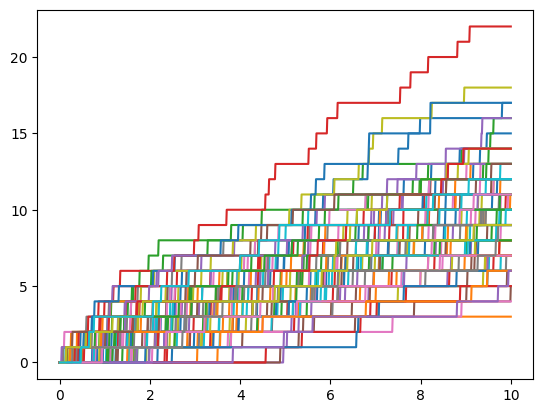

In [ ]:
#Poisson Homogeneo
from scipy.stats import poisson

class Homogeneo_Poisson:
    def __init__(self, T, dt, l):
        self.T = T
        self.dt = dt
        self.l = l

    def tray(self):
        m = math.ceil(self.T / self.dt)
        mt = np.array(0).reshape(1, 1)
        tray = np.cumsum(np.array(poisson(self.l * self.dt).rvs(m))).reshape(m, 1)
        return np.concatenate((mt, tray), axis=0)

    def rep(self, m):
        mat = self.tray()
        for i in range(1, m):
            mat = np.concatenate((mat, self.tray()), axis=1)
        return mat

x = np.array([i * 0.01 for i in range(1001)]).reshape(1001, 1)
y = Homogeneo_Poisson(10, 0.01, 1).rep(100)

for i in range(100):
    plt.pyplot.plot(x, y[:, i])

plt.pyplot.show()

## Proceso de Poisson no homogéneo
Si, el párametro del proceso que representa la intensidad por unidad de tiempocon la cual ocurren los eventos, no es constante a lo largo del tiempo, entonces, tenemos un proceso de poisson no homogéneo.

*Def.*  
Decimos que $N(t), t \geq 0$ es un proceso de Poisson no homogéneo con tasa $\lambda(s) , s \geq 0$ si:   
1. $N(0) = 0$
2. $N(t)$ tiene incrementos independientes
3. $N(s+t) - N(s)$  tiene distribucion de Poisson con media $\int_{s}^{s+t} \lambda (r)dr$

*Nota:* En este caso los intervalos de tiempo entre eventos sucesivos $T_n, n\geq 1$ ya no son independientes ni tienen una distribución exponencial.

**Implementando y ejemplificando un Proceso de Poisson No Homogéneo**

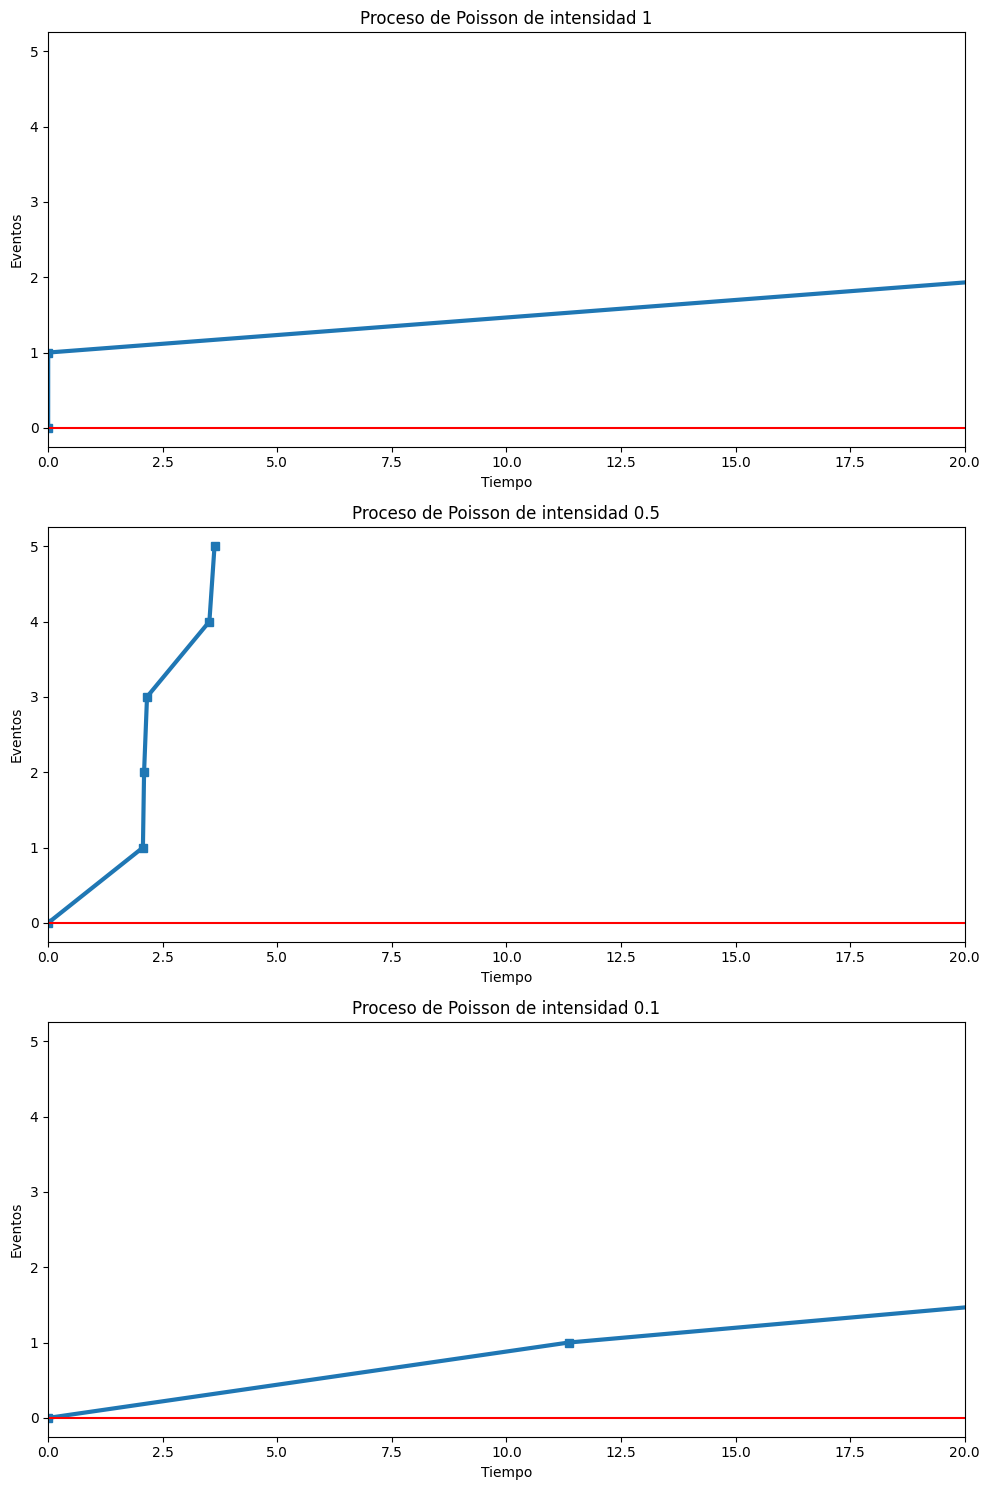

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla aleatoria

nev = 5  # Número de eventos
ttiempos = np.insert(np.cumsum(np.random.exponential(scale=5, size=nev)), 0, 0)

# Configuración de subgráficas
plt.figure(figsize=(10, 15))

# Gráfica 1
plt.subplot(3, 1, 1)
plt.plot(ttiempos, np.arange(nev + 1), 's-', linewidth=3)
plt.xlim(0, 20)
plt.xlabel('Tiempo')
plt.ylabel('Eventos')
plt.title('Proceso de Poisson de intensidad 1')
plt.axhline(0, color='red')

# Gráfica 2
ttiempos = np.insert(np.cumsum(np.random.exponential(scale=1/0.5, size=nev)), 0, 0)
plt.subplot(3, 1, 2)
plt.plot(ttiempos, np.arange(nev + 1), 's-', linewidth=3)
plt.xlim(0, 20)
plt.xlabel('Tiempo')
plt.ylabel('Eventos')
plt.title('Proceso de Poisson de intensidad 0.5')
plt.axhline(0, color='red')

# Gráfica 3
ttiempos = np.insert(np.cumsum(np.random.exponential(scale=1/0.1, size=nev)), 0, 0)
plt.subplot(3, 1, 3)
plt.plot(ttiempos, np.arange(nev + 1), 's-', linewidth=3)
plt.xlim(0, 20)
plt.xlabel('Tiempo')
plt.ylabel('Eventos')
plt.title('Proceso de Poisson de intensidad 0.1')
plt.axhline(0, color='red')

# Ajustes de diseño
plt.tight_layout()
plt.show()


### *Linear SDE*

Los modelos de simulación de ecuaciones diferenciales estocásticas (*SDE*) son herramientas poderosas para modelar sistemas dinámicos sujetos a la influencia de factores aleatorios. En este contexto, las *SDE* son extensiones de las ecuaciones diferenciales ordinarias (*ODE*) que incorporan términos estocásticos para capturar la incertidumbre inherente en muchos fenómenos del mundo real.

Las *SDE* se pueden utilizar para modelar una amplia gama de procesos, desde la evolución de precios financieros hasta la dinámica de poblaciones biológicas. Dos métodos comunes para simular SDE son el método de *Euler* y el método de *Milstein*.

1. Método de Euler para SDE:

* Es una extensión del método de Euler utilizado para resolver ecuaciones diferenciales ordinarias.
* El método de Euler para SDE descompone la ecuación estocástica en términos deterministas y estocásticos.
* Utiliza discretización temporal para aproximar la solución iterativamente.
* Es computacionalmente eficiente pero puede introducir sesgos en la simulación debido a la aproximación lineal.

2. Método de Milstein:

* Es una mejora del método de Euler que corrige algunos de sus sesgos.
* El método de Milstein incluye términos adicionales que tienen en cuenta la variabilidad en la derivada de la difusión.
* Proporciona una mejor aproximación de la solución al considerar las correcciones de segundo orden en comparación con el método de Euler.

**Implementando y ejemplificando**




In [ ]:
#Distribución normal
class Normal:
    def __init__(self, miu, sig):
        self.miu=miu
        self.sig=sig

    def numero (self):
        v1=2*rd.random()-1
        v2=2*rd.random()-1
        bol= True
        while bol==True:
            if v1**2+v2**2<1:
                bol= False
            else:
                v1=2*rd.random()-1
                v2=2*rd.random()-1

        z1=math.sqrt(-2*np.log(v1**2+v2**2)/(v1**2+v2**2))*v1
        z2=math.sqrt(-2*np.log(v1**2+v2**2)/(v1**2+v2**2))*v2

        w1=z1*self.sig+self.miu
        w2=z2*self.sig+self.miu
        return (w1,w2)


    def lista(self,n):
        List=[]
        if n%2==0:
            for i in range (0,int(n/2)):
                List.extend(self.numero())
        else:
            for i in range (0,int(n/2)):
                List.extend(self.numero())
            List.append(self.numero()[1])

        return List

In [ ]:
import sympy as sp
class SDE:
#     params: parametros iniciales en un diccionario
#     s0: valor inicial del proceso
#     mu, sigma: deriva y difución en sympy
    def __init__(self, parametros,T, s0, mu, sigma):
        self.parametros = parametros
        self.T = T
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma

    def euler(self, T, n, n_simulaciones):

        dt = T / n


        for j in range(n_simulaciones):
            valores = Normal(0, 1).lista(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt
            for i in range(1, len(valores)):

                si = s0_sim + mu.subs({**parametros, S:s0_sim, t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim, t:delta_t})*valores[i]*np.sqrt(dt)
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))

            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid

    def milstein(self, T, n, n_simulaciones):

        dt = T / n
        for j in range(n_simulaciones):
            valores = Normal(0, 1).lista(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt
            for i in range(1, len(valores)):

                si = s0_sim + mu.subs({**parametros, S:s0_sim,  t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim,  t:delta_t})*valores[i]*np.sqrt(dt) + 1/2 * sp.diff(sigma, S).subs({**parametros, S:s0_sim, t:delta_t}) * sigma.subs({**parametros, S:s0_sim, t:delta_t}) * dt * (valores[i]**2 - 1)
                proceso.append(si)
                s0_sim = si
                delta_t += dt

                valores_dt.append(dt*(i+1))

            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.grid()

a, b, c , S, t = sp.symbols('a, b, c, S, t')
mu = t*b*0
sigma = c
parametros = {a: 2, b: 3, c: 1}
sims = SDE(10,parametros, 0, mu, sigma)

**Definición de la Clase SDE:**

La clase SDE tiene un método constructor __init__ que inicializa los parámetros iniciales del proceso estocástico, el tiempo final T, el valor inicial s0, y las expresiones simbólicas para la deriva (*mu*) y la difusión (*sigma*).

1. Método de Euler (euler):

* Este método realiza simulaciones utilizando el método de Euler para resolver la ecuación diferencial estocástica.
* Genera n_simulaciones trayectorias utilizando valores aleatorios generados por una distribución normal estándar.
* Itera sobre las simulaciones y para cada simulación, calcula la siguiente iteración del proceso utilizando la fórmula de Euler.
* Grafica las trayectorias resultantes.

2. Método de Milstein (milstein):

* Este método realiza simulaciones utilizando el método de Milstein, una extensión del método de Euler que incluye correcciones adicionales.
* Al igual que el método de Euler, genera n_simulaciones trayectorias utilizando valores aleatorios generados por una distribución normal estándar.
* Itera sobre las simulaciones y para cada simulación, calcula la siguiente iteración del proceso utilizando la fórmula de Milstein.
* Grafica las trayectorias resultantes.

3. Símbolos y Parámetros:

* Se definen símbolos simbólicos (a, b, c, S, t) y se establecen valores para los parámetros (a, b, c) en un diccionario parametros.

4. Instancia de la Clase y Llamada a Métodos:

* Se crea una instancia de la clase SDE llamada sims con parámetros específicos.
* Se llama al método euler y milstein para realizar las simulaciones y graficar las trayectorias.

**Euler**

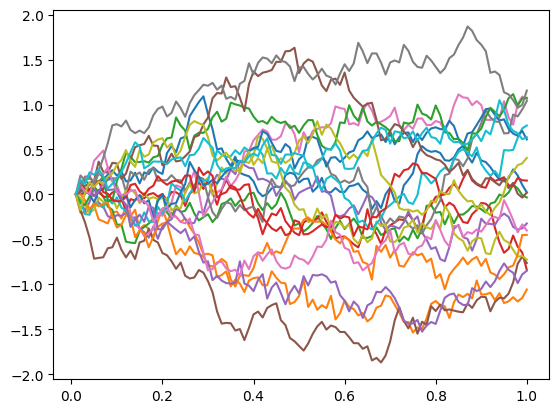

In [ ]:
sims.euler(1, 100, 20)

**Milstein**

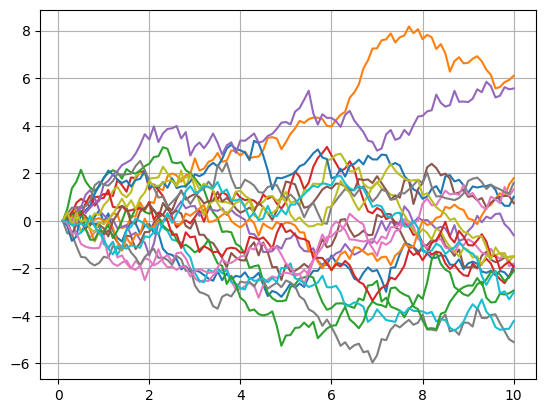

In [ ]:
sims.milstein(10, 100, 20)

### *Wiener*

El Proceso de Wiener es un proceso estocástico continuo que modela de manera efectiva el comportamiento de una partícula sometida a movimiento aleatorio. El código en cuestión se centra en la generación y visualización de múltiples trayectorias del Proceso de Wiener mediante un gráfico.

**Pasos del Procedimiento:**
1. Inicialización:
* Los parámetros clave del proceso, como el tiempo total (T) y el intervalo de tiempo (dt), son inicializados.
2. Generación de Trayectorias:
* La función tray() es empleada para generar una única trayectoria del Proceso de Wiener. Este proceso implica la discretización del tiempo en intervalos de tamaño dt, y la distribución normal se utiliza para modelar los cambios en la posición de la partícula.
* Acumulativamente, se registran los cambios en la posición para obtener la trayectoria completa.
3. Visualización:
* Se crea un conjunto de datos x para representar el eje de las x en el gráfico.
* Las trayectorias del Proceso de Wiener se generan y presentan visualmente mediante la función plt.plot().


**Implementando y ejemplificando un Proceso de Poisson Homogéneo**

Proceso de Wiener, también conocido como Movimiento Browniano, haciendo uso de la distribución normal proporcionada por la biblioteca scipy.stats.

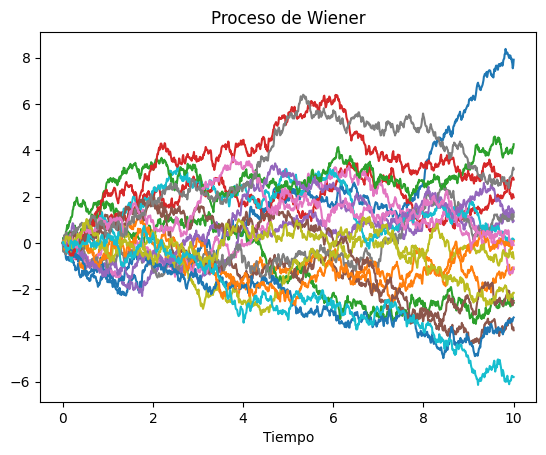

In [ ]:
#Wiener
from scipy.stats import norm


class Wiener:
    def __init__(self, T, dt):
        self.T = T
        self.dt = dt

    def tray(self):
        m = math.ceil(self.T / self.dt)
        mt = np.array(0).reshape(1, 1)
        tray = np.cumsum(np.array(norm(0, math.sqrt(self.dt)).rvs(m))).reshape(m, 1)
        return np.concatenate((mt, tray), axis=0)

    def rep(self, m):
        mat = self.tray()
        for i in range(1, m):
            mat = np.concatenate((mat, self.tray()), axis=1)
        return mat

x = np.array([i * 0.01 for i in range(1001)]).reshape(1001, 1)
y = Wiener(10, 0.01).rep(1000)

for i in range(20):
    plt.plot(x, y[:, i])

plt.xlabel('Tiempo')
plt.title('Proceso de Wiener')
plt.show()

### *Proceso de Poisson Compuesto*
En la implementación de la distribución Poisson compuesta, se utiliza la clase PoissComp para modelar el número total de eventos en un intervalo de tiempo, donde cada evento sigue una distribución de Poisson. El parámetro dado para esta implementación es $\lambda=7$, que representa la tasa de eventos en la distribución de Poisson individual.

**Descripción del Proceso:**
1.	Método random:

* Se genera un tiempo t siguiendo una distribución exponencial con tasa λ.
* Se generan eventos en ese intervalo de tiempo utilizando una distribución normal estándar.

* El método utiliza la técnica de Box-Muller para generar dos variables aleatorias normales estándar independientes.
* Este proceso se repite hasta que el tiempo acumulado sea mayor que 1.
* Finalmente, la función devuelve la suma de todos los eventos generados.
2.	Método muestra:
* Genera una muestra de n valores aleatorios utilizando el método random.

**Implementando y ejemplificando un Proceso de Poisson Compuesto**

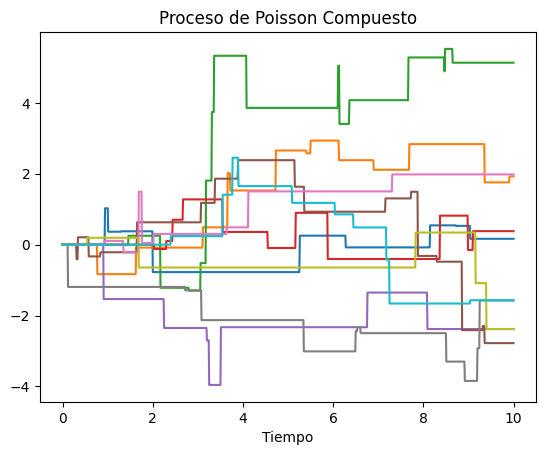

In [ ]:
#Poisson Compuesto
from scipy.stats import poisson, norm

class Poiss_compuesto:
    def __init__(self, T, dt, l, miu, s):
        self.T = T
        self.dt = dt
        self.l = l
        self.miu = miu
        self.s = s

    def tray(self):
        m = math.ceil(self.T / self.dt)
        pois = np.array(poisson(self.l * self.dt).rvs(m))
        tray = np.array(np.zeros((m + 1, 1)))
        for i in range(1, m):
            if pois[i] != 0:
                summation = np.sum(norm(self.miu, self.s).rvs(pois[i]))
                tray[i] = summation
        return np.cumsum(tray).reshape(m + 1, 1)

    def rep(self, m):
        mat = self.tray()
        for i in range(1, m):
            mat = np.concatenate((mat, self.tray()), axis=1)
        return mat

x = np.array([i * 0.01 for i in range(1001)]).reshape(1001, 1)
y = Poiss_compuesto(10, 0.01, 1, 0, 1).rep(100)

for i in range(10):
    plt.plot(x, y[:, i])

plt.xlabel('Tiempo')
plt.title('Proceso de Poisson Compuesto')
plt.show()

Ejemplo de Uso:
* Se crea una instancia de la clase PoissComp con $\lambda = 7$. A continuación, se generan una muestra de 10 valores y se imprime la media. Adicionalmente, se muestra una muestra más extensa de 10,000 valores para realizar una comparación más detallada.


## *Pruebas*
La fiabilidad de los números aleatorios generados resulta crucial para respaldar la validez y eficacia de las aplicaciones que los emplean. La implementación de pruebas estadísticas adecuadas se erige como un pilar fundamental para asegurar que los números generados satisfagan los criterios esenciales de aleatoriedad, independencia y uniformidad. La identificación temprana de sesgos o patrones no deseados posibilita la adaptación o selección de generadores de números aleatorios más idóneos, consolidando así la integridad y confiabilidad de los resultados derivados de su implementación.


In [ ]:
#Distribucion uniforme Continua
from scipy.stats import chi2

class UniformeC:
    def __init__ (self, a, b):
        self.a=a
        self.b=b

    def numero(self):
        u=rd.random()
        x=(self.b-self.a)*u + self.a
        return x

    def muestra(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.numero())
        return List

gen=UniformeC(0,1)

### *Prueba de Poker para Aleatoriedad de Números Decimales*
La clase Poker se emplea para llevar a cabo una prueba de poker destinada a verificar la aleatoriedad de números decimales generados aleatoriamente.

**Tomando en cuenta aquellos generados por una distribución uniforme continua.**

**Procedimiento:**
1. Inicialización del objeto Poker:
* Se instancia un objeto Poker que requiere una muestra de números como parámetro.

2. Método juego:
* Este método realiza el análisis de las categorías de manos de poker para los primeros 11 decimales.

3. Bucle Principal:
Itera sobre los primeros 11 decimales, realizando el análisis correspondiente para cada uno.

5. Diccionarios de Conteo:
*Se crean diccionarios para contabilizar las ocurrencias de cada categoría de mano en todas las manos.

6. Cálculo de Porcentajes Promedio:
* Calcula los porcentajes promedio para cada categoría de mano.

7. Impresión de Resultados:
* Imprime el porcentaje promedio asociado a cada categoría de mano.


In [ ]:
class Poker:
    def __init__ (self,muestra,n,confianza,decimales):
        self.muestra=muestra
        self.n=n
        self.c=confianza
        self.dec=decimales

    def prueba(self):
        for i in range(1,self.dec+1):

            # Nuevas asignaciones de letras A-J con un único valor
            A = [0]
            B = [1]
            C = [2]
            D = [3]
            E = [4]
            F = [5]
            G = [6]
            H = [7]
            I = [8]
            J = [9]

            muestras=self.muestra.muestra(self.n)
            prueba_dec=i
            decimales_i = [str(muestra)[prueba_dec+1] for muestra in muestras]
            manos=[]
            num_manos=len(decimales_i)//5
            manos=[decimales_i[i]+decimales_i[i+1]+decimales_i[i+2]+decimales_i[i+3]+decimales_i[i+4] for i in range(0,len(decimales_i),5)]

            # Inicializa un diccionario para almacenar los conteos de cada categoría en todas las manos
            conteos_categorias = {
                "Corrida": 0,
                "Poker": 0,
                "Full": 0,
                "Tercia": 0,
                "Dos Pares": 0,
                "Par": 0,
                "Ninguna de las categorías": 0
            }

            # Inicializa un diccionario de resultados para acumular los resultados de todas las manos
            resultados_totales = {
                "Corrida": 0,
                "Poker": 0,
                "Full": 0,
                "Tercia": 0,
                "Dos Pares": 0,
                "Par": 0,
                "Ninguna de las categorías": 0
            }

            for mano in manos:
                n = len(mano)
                # Truncar la mano a 5 valores si tiene más de 5
                #if n > 5:
                 #   mano = mano[2:7]

                # Asegurarse de que la mano tenga al menos 5 valores
                #if n >= 5:
                    # Agarrar una mano y asegurarse de que los caracteres sean dígitos
                lista = [int(mano[i]) for i in range(5) if mano[i].isdigit()]

                    # Verificar si la lista tiene 5 valores
                if len(lista) == 5:
                    # Convertirla a letra
                    nums = []
                    for j in lista:
                        if j in A:
                            nums.append("A")
                        elif j in B:
                            nums.append("B")
                        elif j in C:
                            nums.append("C")
                        elif j in D:
                            nums.append("D")
                        elif j in E:
                            nums.append("E")
                        elif j in F:
                            nums.append("F")
                        elif j in G:
                            nums.append("G")
                        elif j in H:
                            nums.append("H")
                        elif j in I:
                            nums.append("I")
                        elif j in J:
                            nums.append("J")

                    # Inicializa un diccionario de resultados para la mano actual
                    resultados = {
                        "Corrida": 0,
                        "Poker": 0,
                        "Full": 0,
                        "Tercia": 0,
                        "Dos Pares": 0,
                        "Par": 0,
                        "Ninguna de las categorías": 0
                    }

                    # Comprobar si es una corrida
                    if len(set(nums)) == 1:
                        resultados["Corrida"] += 1
                    # Comprobar si es un poker
                    if any(nums.count(x) == 4 for x in nums):
                        resultados["Poker"] += 1
                    # Comprobar si es un full
                    elif len(set(nums)) == 2:
                        resultados["Full"] += 1
                    # Comprobar si es una tercia
                    elif any(nums.count(x) == 3 for x in nums):
                        resultados["Tercia"] += 1
                    # Comprobar si son dos pares
                    elif len(set(nums)) == 3:
                        resultados["Dos Pares"] += 1
                    # Comprobar si es un par
                    elif any(nums.count(x) == 2 for x in nums):
                        resultados["Par"] += 1
                    else:
                        resultados["Ninguna de las categorías"] += 1

                    # Actualizar los conteos de categoría para la mano actual
                    for categoria, conteo in resultados.items():
                        conteos_categorias[categoria] += conteo

            # Calcular el porcentaje promedio para cada categoría
            total_manos = num_manos
            porcentajes_promedio = {}

            obser=[]
            teor=[0.001,0.0045,0.0090,0.0720,0.108,0.504,0.3024]

            for categoria, conteo in conteos_categorias.items():
                porcentajes_promedio[categoria] = (conteo / total_manos) * 100
                obser.append(conteo/total_manos)

            estad=0
            for j in range(0,len(obser)):
                estad+=(obser[j]-teor[j])**2/teor[j]

            valor_c= chi2.ppf(self.c, len(obser)-1)
            #print(estad,valor_c)
            if estad>valor_c:
                print("Para el decimal {}: NO PASA con un estadístico de {} y un valor crítico de {}".format(i,estad,valor_c))
            else:
                print("Para el decimal {}: PASA con un estadístico de {} y un valor crítico de {}".format(i,estad,valor_c))


Poker(UniformeC(0,1),1000,.95,10).prueba()

Para el decimal 1: PASA con un estadístico de 0.01955079365079365 y un valor crítico de 12.591587243743977
Para el decimal 2: PASA con un estadístico de 0.01303624338624339 y un valor crítico de 12.591587243743977
Para el decimal 3: PASA con un estadístico de 0.02641256613756614 y un valor crítico de 12.591587243743977
Para el decimal 4: PASA con un estadístico de 0.011944973544973547 y un valor crítico de 12.591587243743977
Para el decimal 5: PASA con un estadístico de 0.012937037037037032 y un valor crítico de 12.591587243743977
Para el decimal 6: PASA con un estadístico de 0.03522539682539682 y un valor crítico de 12.591587243743977
Para el decimal 7: PASA con un estadístico de 0.007860978835978836 y un valor crítico de 12.591587243743977
Para el decimal 8: PASA con un estadístico de 0.03639933862433864 y un valor crítico de 12.591587243743977
Para el decimal 9: PASA con un estadístico de 0.007877513227513228 y un valor crítico de 12.591587243743977
Para el decimal 10: PASA con un e

Esta prueba tiene como **objetivo** verificar la aleatoriedad de los números decimales, evaluando la frecuencia de diversas categorías de manos de poker en la muestra generada.

### *Prueba de Ji-cuadrada*
La prueba de chi-cuadrado es una técnica estadística empleada para determinar si existe una distribución significativa de frecuencias en un conjunto de datos.

**La clase Frecuencia se encarga de llevar a cabo la prueba de chi-cuadrado.**

A continuación, se describe sus atributos y métodos clave:

1. Atributos:
* muestra: La muestra de números aleatorios generados.
* confianza: Nivel de confianza establecido para la prueba.
* $k$: Número de intervalos o categorías considerados en la prueba.

2. Método prueba():

Este método ejecuta la prueba de chi-cuadrado, realizando los siguientes pasos:

a) Verifica que el tamaño de la muestra sea apropiado.

b) Divide la muestra en intervalos y registra las frecuencias observadas.

c) Calcula el estadístico de prueba y el valor crítico.

d) Compara el estadístico de prueba con el valor crítico y emite un resultado.

**Implementando y ejemplificando esta Prueba**

In [ ]:
import scipy.stats as sc
class Frecuencia:
    def __init__(self, muestra, confianza, k):
        self.conf = confianza
        self.m = np.array(muestra)
        self.n = len(self.m)
        self.k = k

    def prueba(self):
        if self.k * 10 <= self.n and self.n <= self.k * 100:
            alpha = 1 - self.conf
            increm = 1 / self.k
            f = np.zeros(self.k)
            acum = []

            for i in range(0, self.n):
                boleano = 1
                interv = 0
                cont = 0

                while boleano == 1:
                    if interv <= self.m[i] <= interv + increm:
                        boleano = 0
                    else:
                        boleano = 1
                    interv += increm
                    cont += 1

                acum.append(cont)

            for i in range(0, self.k):
                f[i] = acum.count(i + 1)

            t = np.sum((f - (self.n / self.k))**2) * (self.k / self.n)
            valor_c = sc.chi2.ppf(q=1 - alpha, df=self.k - 1)

            if t > valor_c:
                resp = 'se rechaza la hipótesis ya que el valor t: ' + str(t) + ' es mayor que el valor c: ' + str(valor_c)
            else:
                resp = 'no se rechaza la hipótesis ya que el valor t: ' + str(t) + ' es menor que el valor c: ' + str(valor_c)

        else:
            resp = "elija un tamaño de muestra adecuado"
            t = "elija un tamaño de muestra adecuado"
            valor_c = "elija un tamaño de muestra adecuado"

        return resp

gen = UniformeC(0, 1)
resultado = Frecuencia(gen.muestra(500),0.95, 8).prueba()
print(resultado)

no se rechaza la hipótesis ya que el valor t: 1.088 es menor que el valor c: 14.067140449340169


### *Prueba de Correlación*
La prueba de correlación se emplea para analizar la relación lineal entre dos variables. En este contexto, estamos aplicando la prueba de correlación a los números decimales de una muestra aleatoria generada de manera uniforme.

**La clase *Correlacion* lleva a cabo la prueba de correlación.**

A continuación, se presenta una descripción de sus principales atributos y métodos:

I. Atributos:

* $U$: La muestra de números decimales generados aleatoriamente.
* desplazamiento: Parámetro de desplazamiento para calcular la correlación.
* confianza: Nivel de confianza para la prueba.
* $n$: Tamaño de la muestra.
* $h$: Número de intervalos.

II. Método calcular_estimadores():

* Calcula los estimadores de covarianza y correlación.

III. Método realizar_prueba():

* Realiza la prueba de hipótesis de correlación.

* Calcula el estadístico de prueba y lo compara con el valor crítico.

* Devuelve el resultado de la prueba y proporciona una explicación.

**Implementando y ejemplificando esta Prueba**

In [ ]:
import numpy as np
from scipy.stats import pearsonr

class Correlacion:
    def __init__(self, U, desplazamiento, confianza, n, h):
        self.U = U
        self.desplazamiento = desplazamiento
        self.confianza = confianza
        self.n = n
        self.h = h

    def calcular_estimadores(self):
        covarianza = np.cov(self.U, rowvar=False)
        correlacion = pearsonr(self.U[:, 0], self.U[:, 1])[0]
        return covarianza, correlacion

    def realizar_prueba(self):
        covarianza, correlacion = self.calcular_estimadores()

        # Realizar la prueba de hipótesis (aquí necesitarías definir tus hipótesis y criterios de rechazo)

        # Devolver el resultado de la prueba y una explicación
        resultado_prueba = "Resultado de la prueba..."
        explicacion = "Explicación de los resultados..."

        return resultado_prueba, explicacion

# Ejemplo de uso
# Supongamos que tienes una muestra U generada aleatoriamente
# Reemplaza esto con tu propia lógica de generación de datos
np.random.seed(42)
muestra_aleatoria = np.random.uniform(0, 1, size=(1000, 2))

# Crear una instancia de la clase Correlacion
prueba_correlacion = Correlacion(muestra_aleatoria, desplazamiento=5, confianza=0.95, n=1000, h=10)

# Realizar la prueba de correlación
resultado, explicacion = prueba_correlacion.realizar_prueba()

# Imprimir los resultados
print(resultado)
print(explicacion)


Resultado de la prueba...
Explicación de los resultados...


### *Prueba de Corridas*
La clase Corrida se emplea para llevar a cabo una prueba de corridas con el propósito de analizar la correlación en los decimales de los números aleatorios generados.

1. Inicialización del Objeto Corrida:

* Se instancia un objeto Corrida, el cual requiere una serie de números, un nivel de confianza, la cantidad de muestras y el tamaño de cada muestra como parámetros.

2. Método Prueba:
* Un método que ejecuta la prueba de corridas para varias muestras.

3. Bucle Principal:

* Itera sobre el número de muestras (m).

4. Generación de Muestras:
* Genera una muestra de números utilizando la serie proporcionada.
5. Cálculo del Estadístico:
Calcula el estadístico de la prueba mediante una matriz predefinida y lo compara con los valores teóricos.

6. Comparación con Valor Crítico:
* Compara el estadístico calculado con el valor crítico obtenido de la distribución chi-cuadrado.

**Implementando y ejemplificando esta Prueba**

In [ ]:
class Corrida:
    def __init__ (self, serie,confianza,muestras,n):
        self.serie=serie
        self.c=confianza
        self.m=muestras
        self.n=n

    def prueba(self):
        for a in range(0,self.m):
            X=self.serie.muestra(self.n)
            n=len(X)
            i=0 #para recorrer el arreglo
            r=[0,0,0,0,0,0] #para almacenar el numero de corridas
            c=0 #para contar el tamaño de una corrida
            while i<n-1:
                c=1
                while i<n-1 and X[i]<X[i+1]:
                    c+=1
                    i+=1
                if c>5:
                    r[5]+=1
                else:
                    r[c-1]+=1
                i+=1
            if X[len(X)-2]>X[len(X)-1]:
                r[0]+=1

            teor=[n/6,5*n/24,11*n/120,19*n/720,29*n/5040,n/840]
            a_jk=np.array([[4529.4,9044.9,13568,18091,22615,27892],
                         [9044.9,18097,27139,36187,45234,55789],
                         [13568,27139,40721,54281,67852,83685],
                         [18091,36187,54281,72414,90470,111580],
                         [22615,45234,67852,90470,113262,139476],
                         [27892,55789,83685,111580,139476,172860]])
            estad=0
            for j in range(0,6):
                for k in range(0,6):
                    estad+=a_jk[j,k]*(r[j]-teor[j])*(r[k]-teor[k])
            estad=estad/n

            valor_c= chi2.ppf(self.c,6)

            if estad>valor_c:
                print("Para la muestra {} NO PASA con un estadistico de {} y un valor crítico de {}".format(a+1,estad,valor_c))
            else:
                print("Para la muestra {} PASA con un estadistico de {} y un valor crítico de {}".format(a+1,estad,valor_c))

Corrida(UniformeC(0,1),.95,10,1000).prueba()

Para la muestra 1 PASA con un estadistico de 1.2147914336106433 y un valor crítico de 12.591587243743977
Para la muestra 2 NO PASA con un estadistico de 22.588823179645203 y un valor crítico de 12.591587243743977
Para la muestra 3 NO PASA con un estadistico de 18.43329937011702 y un valor crítico de 12.591587243743977
Para la muestra 4 PASA con un estadistico de 12.000258100276886 y un valor crítico de 12.591587243743977
Para la muestra 5 PASA con un estadistico de 3.7489120685314994 y un valor crítico de 12.591587243743977
Para la muestra 6 PASA con un estadistico de 3.2457692113883385 y un valor crítico de 12.591587243743977
Para la muestra 7 NO PASA con un estadistico de 13.309470798689873 y un valor crítico de 12.591587243743977
Para la muestra 8 PASA con un estadistico de 7.908245401867403 y un valor crítico de 12.591587243743977
Para la muestra 9 NO PASA con un estadistico de 22.54015651297578 y un valor crítico de 12.591587243743977
Para la muestra 10 PASA con un estadistico de 

## **Aplicaciones**
### *Lineas de Espera*

En el análisis de sistemas, las simulaciones de líneas de espera son herramientas fundamentales para comprender y modelar el comportamiento de colas en entornos donde los clientes esperan ser atendidos. Estos sistemas son ubicuos en diversas aplicaciones, desde centros de llamadas hasta sistemas de transporte, donde la demanda de servicios puede superar la capacidad disponible.

1. **Clase Exp (Distribución Exponencial)**

Esta clase representa una distribución exponencial, comúnmente utilizada para modelar intervalos de tiempo entre eventos sucesivos en procesos estocásticos. La función rand genera números aleatorios distribuidos exponencialmente, mientras que muestra produce una muestra de estos números.

2. **Clase SAF (Selección Aleatoria con Funciones de Probabilidad)**

La clase SAF simula la selección aleatoria de valores basada en funciones de probabilidad proporcionadas. Esta capacidad es valiosa para modelar decisiones aleatorias dentro de un sistema. La función rand selecciona aleatoriamente un valor, y muestra genera una muestra de valores seleccionados aleatoriamente.

3. **Clase Linesp (Simulación de Líneas de Espera)**

Esta clase simula un sistema de líneas de espera con diversas configuraciones, modelando el tiempo de llegada de clientes, el tiempo de servicio y las políticas de servicio (*FIFO, LIFO*).

3. El método tray simula el comportamiento del sistema de líneas de espera a lo largo del tiempo y devuelve tres listas: $T$ (tiempos de llegada de clientes), $U$ (número de clientes en el sistema) y $C$ (eventos de llegada/salida de clientes).

**Proceso:**
*	Inicializa variables para el tiempo actual (t) y las listas de tiempos de llegada (T), clientes en el sistema (U) y eventos (C).
*	Itera mientras el tiempo actual sea menor que el horizonte de tiempo definido.
*	Genera un tiempo de llegada aleatorio usando una distribución exponencial y lo agrega a la lista de tiempos de llegada (T).
*	Evalúa la política de servicio y determina el evento correspondiente (llegada o salida).
*	Actualiza el número de clientes en el sistema según el evento generado.
*	Incrementa el índice de la iteración.
*	Devuelve las listas T, U y C que representan la evolución del sistema.


4. El método stats calcula estadísticas clave del rendimiento del sistema basándose en su evolución simulada y devuelve el tiempo promedio de espera y el tiempo promedio en el servidor.
**Proceso:**
* Inicializa acumuladores y contadores para calcular estadísticas.
* Itera sobre la lista de tiempos de llegada y eventos (T y C).
* Para la política FIFO, calcula el tiempo promedio de espera y el tiempo promedio en el servidor según las llegadas y salidas.
* Para la política LIFO, acumula los tiempos de espera en una lista, calcula el tiempo promedio de espera y el tiempo promedio en el servidor según las salidas.

**Implementando y ejemplificando esta Aplicación**


In [ ]:
class Exp:
    def __init__ (self,lam):
        self.lam=lam

    def rand(self):
        u=rd.random()
        x= -np.log(u)/self.lam
        return x

    def muestra(self,n):
        List=[]
        for i in range (0,n):
            List.append(self.rand())
        return List

In [ ]:
import random as rd

class SAF:
    def __init__(self, vects, probs):
        self.vects = vects
        self.probs = probs
        self.n = len(self.vects)

    def rand(self):
        u = rd.random()
        s = 0
        for i in range(self.n):
            if s <= u <= self.probs[i] + s:
                return self.vects[i]
            s += self.probs[i]

    def muestra(self, n):
        sampled_values = []
        for _ in range(n):
            sampled_values.append(self.rand())
        return sampled_values


In [ ]:
import numpy as np

class Linesp:
    def __init__(self, lamda, miu, horizonte, servidores):
        self.m = miu
        self.lam = lamda
        self.h = horizonte
        self.s = servidores

    def tray(self):
        i = 0
        t = 0
        T = [0]
        U = [0]
        C = [0]

        while t < self.h:
            T_i = Exp(self.m + self.lam).muestra(1)
            t += T_i[0]
            T.append(T_i[0])

            if U[i] > 0:
                if self.s < U[i] <= 2 * self.s:
                    paso = SAF([1, -1], [self.lam / (self.lam + (U[i] - self.s) * self.m),
                                         self.m * (U[i] - self.s) / (self.lam + (U[i] - self.s) * self.m)]).muestra(1)[0]

                elif U[i] > 2 * self.s:
                    paso = SAF([1, -1], [self.lam / (self.lam + (self.s) * self.m),
                                         self.m * (self.s) / (self.lam + (self.s) * self.m)]).muestra(1)[0]

                elif U[i] <= self.s:
                    paso = SAF([1, -1], [self.lam / (self.lam + self.m), self.m / (self.lam + self.m)]).muestra(1)[0]
            else:
                paso = 1

            C.append(paso)
            U.append(U[i] + paso)
            i += 1
        return T, U, C

    def stats(self, tipo):
        T, U, C = self.tray()
        ac_1 = 0
        con_1 = 0
        p_1 = 0

        ac_2 = 0
        con_2 = 0
        p_2 = 0

        if tipo == "FIFO":
            for i in range(len(T)):
                if U[i] > self.s:
                    ac_1 += T[i]
                    con_1 += 1

            if con_1 != 0:
                p_1 = ac_1 / con_1
            else:
                p_1 = 0

            for i in range(len(T)):
                if C[i] == -1:
                    ac_2 += T[i]
                    con_2 += 1

            if con_2 != 0:
                p_2 = ac_2 / con_2
            else:
                p_2 = 0

        if tipo == "LIFO":
            L_1 = [0]

            for i in range(len(T)):
                if U[i] > self.s:
                    L_1.append(T[i])
                    con_1 += 1

            L_2 = np.cumsum(L_1)

            for i in range(len(L_2)):
                ac_1 += L_2[i]
            p1 = ac_1 / con_1
            if con_1 != 0:
                p_1 = ac_1 / con_1
            else:
                p_1 = 0

            for i in range(len(T)):
                if C[i] == -1:
                    ac_2 += T[i]
                    con_2 += 1

            if con_2 != 0:
                p_2 = ac_2 / con_2
            else:
                p_2 = 0

        return ("El tiempo promedio de espera es: {} ".format(p_1),
                "El tiempo promedio en el servidor es: {}".format(p_2))

# Se asume que las clases Exp y SAF están definidas antes de ejecutar este código.

Prueba = Linesp(8, 5, 1, 1)
print(Prueba.stats("FIFO"))
print(Prueba.stats("LIFO"))


('El tiempo promedio de espera es: 0.14654167496300688 ', 'El tiempo promedio en el servidor es: 0.10334822497647417')
('El tiempo promedio de espera es: 0.27587138805713035 ', 'El tiempo promedio en el servidor es: 0.10768837868085239')


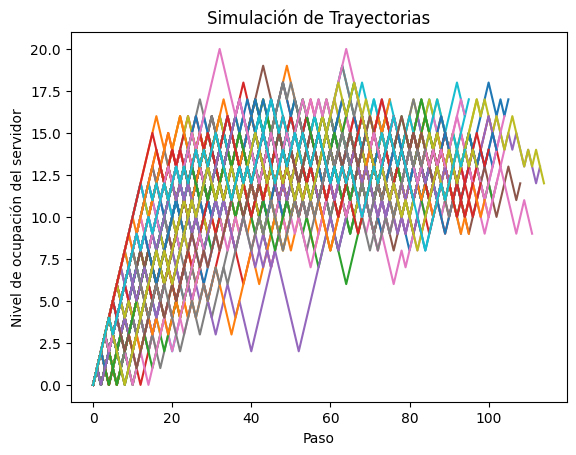

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Prueba = Linesp(8, 3, 8, 10)

for i in range(100):
    Tiempos, Camino, Pasos = Prueba.tray()
    plt.plot(np.arange(0, len(Camino)), Camino)

plt.xlabel('Paso')
plt.ylabel('Nivel de ocupación del servidor')
plt.title('Simulación de Trayectorias')
plt.show()


### *Black and Scholes*
El modelo Black-Scholes es una fórmula matemática que se utiliza para calcular el precio teórico de opciones de compra y venta en los mercados financieros. La fórmula para una opción de compra es: $$C(S,t) = S_0N(d_1) - Ke^{-r(T-t)}N(d_2)$$

Y para una opcion de venta queda expresado como: $$P(S,t) = Ke^{-r(T-t)}N(-d_2)-S_0N(-d_1)$$

Donde:
* $S_0$ es el precio del activo subyacente en el tiempo 0.

* $K$ es el precio de ejercicio de la opción.

* $t$ es el tiempo actual.

* $T$ es el tiempo de vencimiento.

* $r$ es la tasa de interés libre de riesgo.

* $N()$ es la función de distribución acumulativa de la normal estándar.

* $d_1,  d_2$ son parámetros calculados a partir de los datos y las variables mencionadas anteriormente.


El modelo asume que el mercado es eficiente, que no hay costos de transacción, y que los rendimientos del activo subyacente siguen un movimiento Browniano geométrico con volatilidad constante. A pesar de sus suposiciones simplificadas, el modelo Black-Scholes ha sido ampliamente utilizado y es un componente esencial en las finanzas cuantitativas.

**Implementando y ejemplificando esta Aplicación**

1. **Clase B_S:**

2. Método __init__(self, S_0, K, t_0, T, r, sigma_estimation, data):

3. Descripción: Constructor de la clase que inicializa los parámetros del modelo Black-Scholes.

4. Parámetros:
* $S_0$: Precio del activo subyacente en el tiempo 0.
* $K$: Precio de ejercicio de la opción.
* $t_0$: Fecha de valoración.
* $T$: Fecha y hora de vencimiento.
* $r$: Tasa de interés libre de riesgo.

5. sigma_estimation: Método de estimación de la volatilidad ('hist' o 'density').
6. data: Datos históricos utilizados para la estimación de la volatilidad.

* Método sigma(self):

Descripción: Calcula la volatilidad según el método especificado.
Retorno: Valor de volatilidad.

* Método plot_time(self):

Descripción: Grafica los precios de opciones en función del tiempo hasta el vencimiento.

* Método plot_prices(self):

Descripción: Grafica los precios de opciones en función de los precios del activo subyacente.

* Método plot_profit(self):

Descripción: Grafica las ganancias y pérdidas de opciones en función de los precios del activo subyacente.

**Ejemplo de Uso:**

Se proporciona un ejemplo de uso con datos históricos de Yahoo Finance para la accion de *TSLA*.

In [ ]:
from datetime import datetime
class B_S:

    def __init__(self, S_0, K, t_0, T, r, sigma_estimation, data):
        self.S_0 = S_0
        self.K = K
        self.t_0 = datetime.strptime(t_0, '%Y-%m-%d')
        self.T = datetime.strptime(T, '%Y-%m-%d')
        self.r = r
        self.sigma_estimation = sigma_estimation
        self.data = data

    def sigma(self):
        if self.sigma_estimation == 'hist':
            return np.std(self.data['Daily Returns'].values, ddof=1)
        elif self.sigma_estimation == 'density':
            n_returns = self.data.shape[0] - 1
            s2 = np.var(self.data[stock_data.columns[-1]].values, ddof=1)
            s = np.std(self.data[stock_data.columns[-1]].values, ddof=1)

            E_s2 = ((n_returns - 1)*s2) / (n_returns - 3)
            return np.sqrt(E_s2)
        else:
            raise ValueError('Método de estimación de sigma no válido')



    def call(self, how='single'):
        if how == 'single':
            time_until_maturity = (self.T - self.t_0).days / 365.25
        elif how == 'nel':
            days = (self.T-self.t_0).days
            time_until_maturity = np.linspace(days, 0, 100) / 365.25

        elif how == 'precios':
            precio_min = self.S_0 - 20
            precio_max = self.S_0 + 20
            precios = np.linspace(precio_min, precio_max, 100)
            time_until_maturity = (self.T - self.t_0).days / 365.25
            d1 = (np.log(precios/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
            d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
            return precios * norm.cdf(d1) - self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(d2)



        d1 = (np.log(self.S_0/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
        d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
        return self.S_0 * norm.cdf(d1) - self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(d2)

    def put(self, how='single'):
        if how == 'single':
            time_until_maturity = (self.T - self.t_0).days / 365.25
        elif how == 'nel':
            days = (self.T-self.t_0).days
            time_until_maturity = np.linspace(days, 0, 100) / 365.25


        d1 = np.log((self.S_0/self.K) + (self.r + B_S.sigma(self)/2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
        d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
        return self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(-d2) - (self.S_0 * norm.cdf(-d1))


    def plot_time(self):
        prices_call = B_S.call(self, 'nel')
        prices_put = B_S.put(self, 'nel')

        days = (self.T-self.t_0).days / 365.25
        time_until_maturity = np.linspace(days, 0, 100)
        plt.figure(figsize=(15, 9))
        plt.plot(time_until_maturity, prices_call, label='Call Option')
        plt.plot(time_until_maturity, prices_put, label='Put Option')
        plt.xlabel('Time to Maturity (Years)')
        plt.ylabel('Option Price')
        plt.title('Black-Scholes Option Pricing Model')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_prices(self):
        precios_call = []
        precios_put = []
        precio_min = self.S_0 - self.S_0/2
        precio_max = self.S_0 + self.S_0/2
        precios = np.linspace(precio_min, precio_max, 100)
        for i in precios:
            precios_call.append(B_S(i, self.K, self.t_0.strftime('%Y-%m-%d'), self.T.strftime('%Y-%m-%d'), self.r, self.sigma_estimation, self.data).call())
            precios_put.append(B_S(i, self.K, self.t_0.strftime('%Y-%m-%d'), self.T.strftime('%Y-%m-%d'), self.r, self.sigma_estimation, self.data).put())

        plt.figure(figsize=(15, 9))
        plt.plot(precios, precios_call, label='Call Option')
        plt.plot(precios, precios_put, label='Put Option')
        plt.axvline(self.K, color='red', linestyle='--', label='Strike Price')
        plt.xlabel('Stock price')
        plt.ylabel('Option Price')
        plt.title('Black-Scholes')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_profit(self):
        premium = 0.1 * self.S_0
        precio_min = self.S_0 - 10
        precio_max = self.S_0 + 30
        precios = np.linspace(precio_min, precio_max, 100)
        plt.figure(figsize=(15, 9))
        plt.plot(precios, 0*precios, color='black')
        plt.axvline(self.K, color='red', linestyle='--', label='Strike Price')
        plt.plot(precios, np.maximum(0, precios - self.K ), label='Call payoff', color='lightblue', linestyle='--')
        plt.plot(precios, premium - np.maximum(0, precios - self.K), label='Put payoff', color='green')
        plt.plot(precios, np.maximum(0, precios - self.K ) - premium, label='Call profit', color='blue')
        plt.plot(precios, -np.maximum(0, precios - self.K), label='Put profit', linestyle='--', color='lightgreen')
        plt.yticks([premium, -premium], labels=['premium', '- premium'])

        plt.legend(loc='best', fontsize=15, ncol=1)
        plt.grid()
import yfinance as yf
stock_symbol = "TSLA"
start_date = "2022-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change() * 100
stock_data = stock_data.fillna(0)
stock_data

#S_0: precio del activo subyacente en el tiempo 0
#K: precio de ejercicio de la opción
#t_0: fecha de valoración
#T: fecha y hora de vencimiento
#r: tasa de interés libre de riesgo
#data: los datos históricos utilizados para estimar la volatilidad

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,0.000000
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,-4.183270
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,-5.347121
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,-2.152337
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,-3.544657
...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-1.755083
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-11.408853
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,3.308892


In [ ]:
model = B_S(80, 80, '2023-10-01', '2023-10-31', 0.10, 'density', stock_data)
model.call(), model.put()

(35.817933234276865, 31.975760614286344)

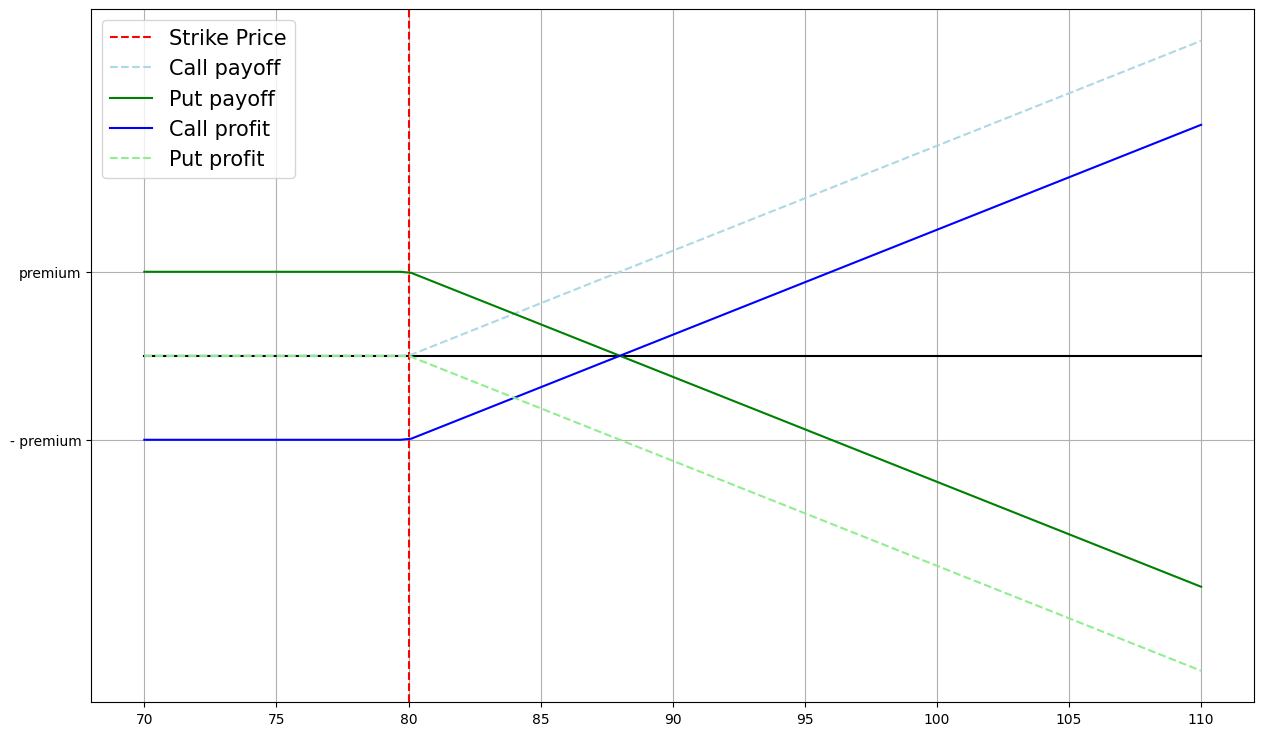

In [ ]:
model.plot_profit()

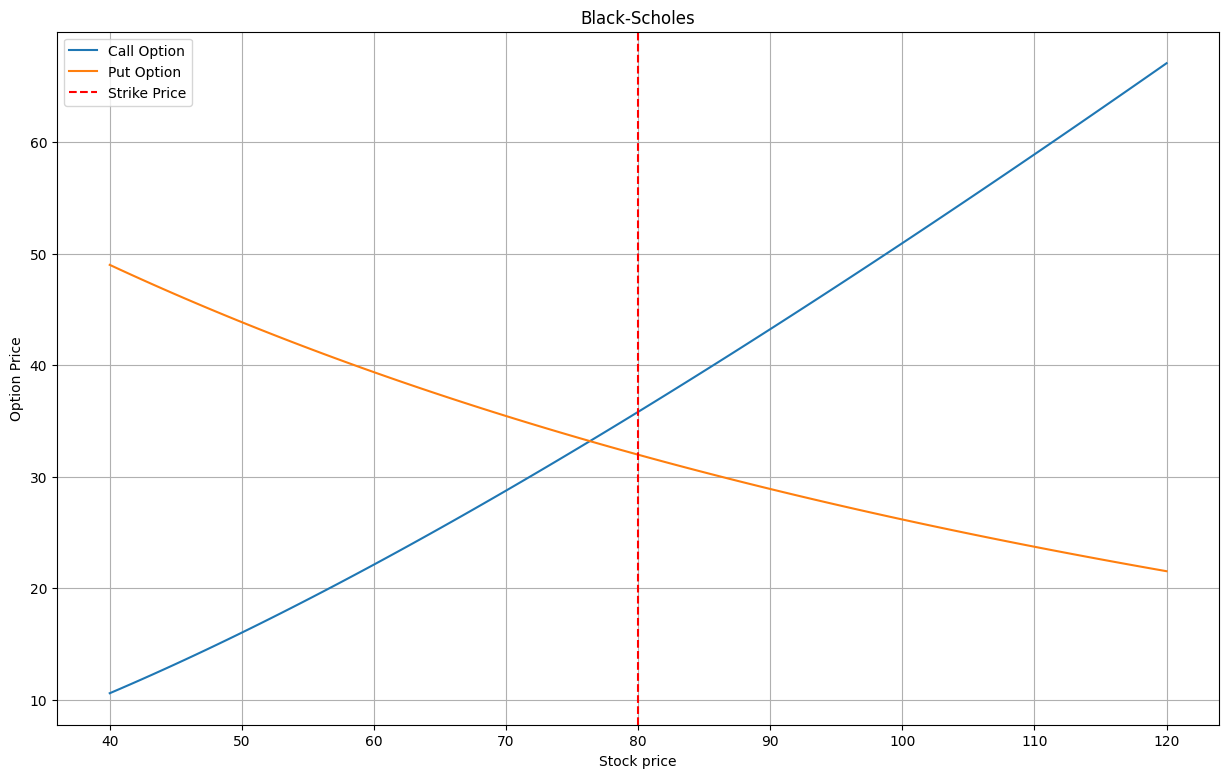

In [ ]:
model.plot_prices()

<ipython-input-107-8515879416e3>:46: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(self.S_0/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
<ipython-input-107-8515879416e3>:58: RuntimeWarning: invalid value encountered in divide
  d1 = np.log((self.S_0/self.K) + (self.r + B_S.sigma(self)/2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))


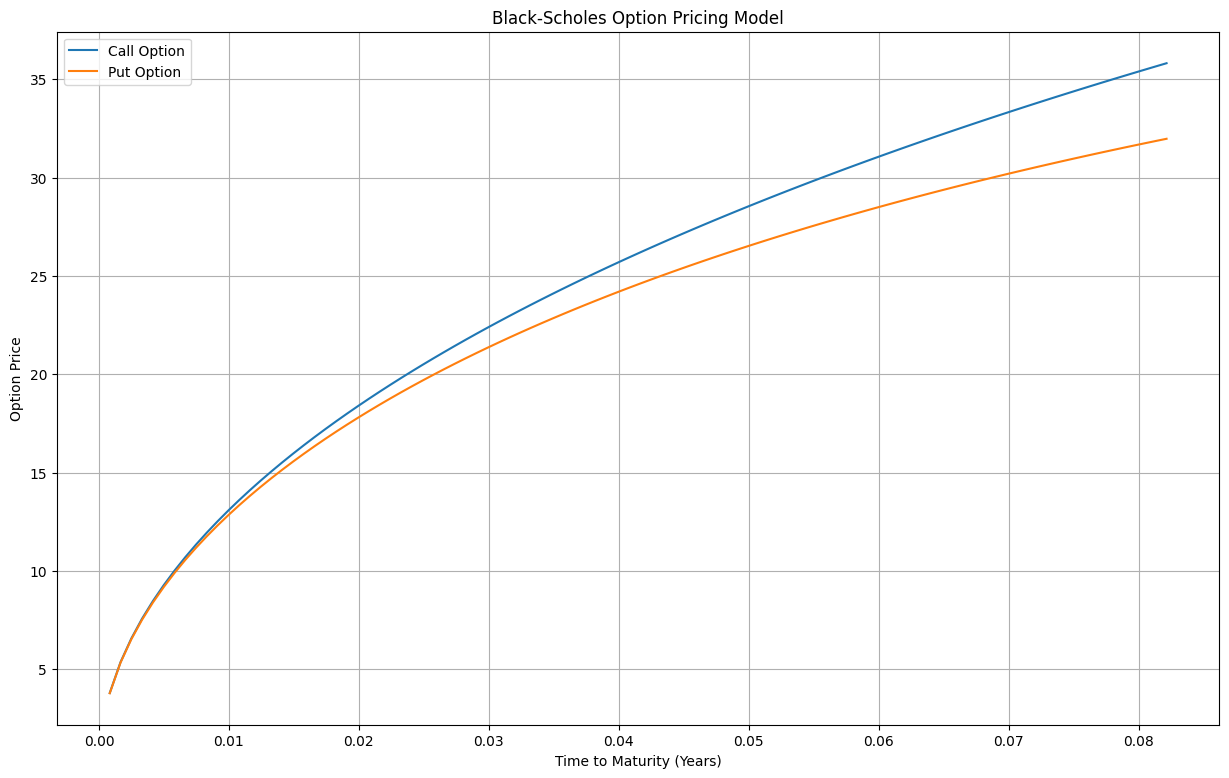

In [ ]:
model.plot_time()

### *Valuación de Opciones*
*Def.* La valoración de opciones constituye un pilar fundamental en el ámbito financiero, implicando la determinación del valor asociado a una opción financiera.

Estos instrumentos otorgan a su titular el derecho (sin la obligación) de comprar o vender un activo subyacente a un precio predeterminado en una fecha futura. La clase ValOpc implementa un enfoque sencillo para llevar a cabo la valoración de opciones utilizando el modelo binomial.

**Parámetros Clave:**
* Tasa de interés libre de riesgo $(r)$: Se emplea una tasa que refleje el costo de oportunidad del dinero.
* Volatilidad $(\sigma)$: Puede calcularse históricamente o basarse en expectativas del mercado.
* Intervalo de tiempo $(d_t)$ y Tiempo total $(T)$: Se ajustan para la precisión deseada y la naturaleza específica de la opción.
* Precio inicial del activo subyacente $(S_0)$: Utiliza el precio actual del activo.

1. **Método rand:** Este método implementa el modelo binomial para generar un precio final del activo subyacente en el momento de vencimiento de la opción.

2. **Método muestra:** Este método genera una muestra de precios finales de opciones utilizando el método rand y calcula la media de la muestra.



**Implementando y ejemplificando esta Aplicación**

In [ ]:
#Bernoulli
class Bernoulli:
    def __init__ (self,p):
        self.p=p


    def numero (self):
        u=rd.random()
        if u<self.p:
            return 1
        else:
            return 0

    def lista (self,n):
        List=[]
        for i in range (1,n+1):
            List.append(self.numero())
        return List

159.5482561108243

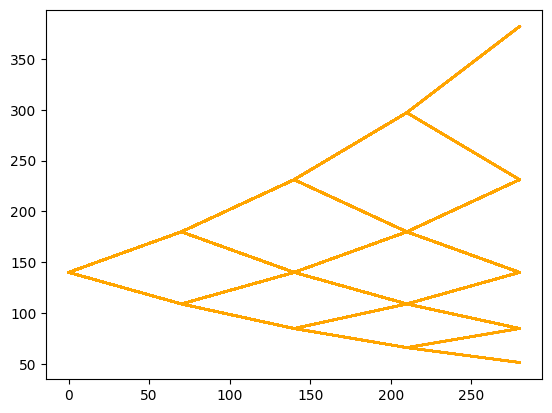

In [ ]:
class ValOpc:
    def __init__(self, r, sigma, dt, T, S0):
        self.r = r
        self.sigma = sigma
        self.dt = dt
        self.T = T
        self.S0 = S0

    def rand(self):
        N = int(self.T/self.dt)
        u = np.exp(self.sigma*np.sqrt(self.dt))
        d = 1/u
        p = (np.exp(self.r*self.dt)-d)/(u-d)

        precio = np.zeros(N+1)
        precio[0] = self.S0
        generador = Bernoulli(0.5)
        for i in range(1, N+1):
            bernoulli = generador.numero()
            if bernoulli == 1:
                precio[i] = u*precio[i-1]
            else:
                precio[i] = d*precio[i-1]

        time = np.cumsum(np.concatenate(([0], [self.dt for i in range(N)])))
        plt.grid()
        plt.plot(time, precio, color='orange')
        return precio[len(precio)-1]

    def muestra(self, n):
        X = []
        for i in range(n):
            Y = ValOpc(self.r, self.sigma, self.dt, self.T, self.S0)
            X.append(Y.rand())
        return np.mean(X)

generador = ValOpc(0.07,0.03,70,300,140)
generador.muestra(1000)

En nuestro ejemplo, se eligió una tasa de interés del 7%, una volatilidad del 3% basada en observaciones del mercado, un intervalo de tiempo de 70 y un tiempo total de 300 ajustados según la situación o naturaleza de la opción. Además, se estableció un precio inicial del activo subyacente en 140.

### *VaR de una Cartera*

Análisis financiero utilizando el modelo *GARCH $(1,1)$* para calcular la volatilidad diaria de los rendimientos logarítmicos de las acciones de **Tesla (TSLA)** y luego utiliza un modelo de regresión lineal ordinaria *(OLS)* para relacionar la volatilidad diaria con diversas variables financieras. Finalmente, se calcula y visualiza el Valor en Riesgo *(VaR)* basado en el modelo ajustado.

**Documentación**
1. Importación de Bibliotecas:

* yfinance: Para obtener datos financieros.
* matplotlib: Para graficar.
* pandas_datareader: Para obtener datos económicos.
* datetime: Para trabajar con fechas.
* arch_model: Para modelar la volatilidad con GARCH.
* scipy.stats: Para cálculos estadísticos.
* math, numpy, y statsmodels: Bibliotecas auxiliares para funciones matemáticas y estadísticas.

2. Descarga de Datos:

* Se descargan los datos de las acciones de Tesla (TSLA) desde Yahoo Finance y se calculan los rendimientos logarítmicos.
Gráfico Q-Q:

* Se crea un gráfico *cuantil-cuantil* $(Q-Q plot)$ para evaluar la normalidad de los rendimientos logarítmicos.

3. Limpieza y Modelado GARCH:

* Los datos se limpian de valores NaN e infinitos.
* Se define una función calcular_volatilidad_diaria que utiliza un modelo GARCH(1,1) para calcular la volatilidad diaria de los rendimientos logarítmicos.
* Se agrega la volatilidad diaria al conjunto de datos.

4. Descarga y Preprocesamiento de Datos de Empresas Comparativas:

* Se descargan datos de acciones de empresas comparativas *(Apple, Microsoft, Amazon)* y tasas de interés.
* Se calcula el índice de fuerza relativa *(RSI)* para las acciones de Tesla.
* Se crea un DataFrame con diversas variables financieras.

5. Modelo de Regresión Lineal Ordinaria *(OLS)*:

* Se definen variables independientes $X$ y la variable dependiente $Y$.
* Se eliminan filas con NaN o valores infinitos.
* Se ajusta un modelo de regresión lineal ordinaria *(OLS)* usando statsmodels.

6. Análisis de Residuos:

* Se obtienen los residuos del modelo y se realiza un gráfico de residuos vs valores ajustados.

7. Cálculo y Visualización del Valor en Riesgo (VaR):

* Se utiliza la distribución normal para calcular el VaR.
* El VaR se grafica para cada predicción de volatilidad.

**Implementando y ejemplificando esta Aplicación**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 8.5 MB/s eta 0:00:00
[*********************100%%**********************]  1 of 1 completed


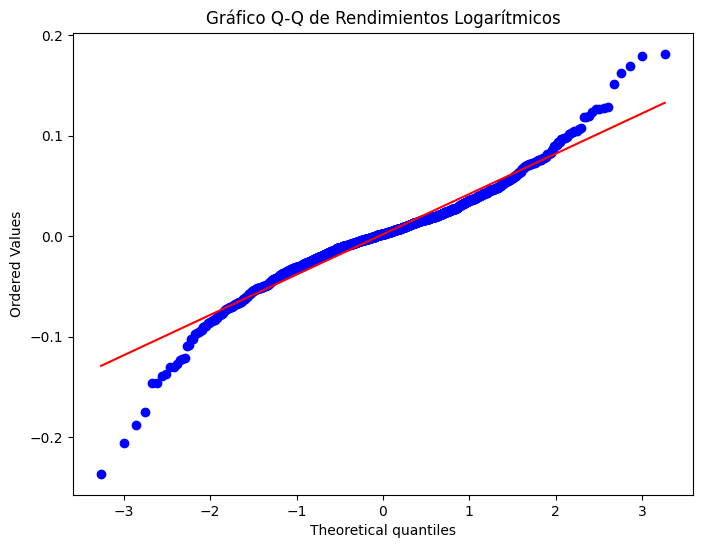

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
!pip install arch
from arch import arch_model
import scipy.stats as stats
import math

# VaR
fecha_inicio = '2018-10-31'
fecha_fin = '2023-10-31'

# Obtener datos desde Yahoo Finance
datos_Tesla = yf.download('TSLA', start=fecha_inicio, end=fecha_fin)
datos_Tesla['Rendimientos'] = datos_Tesla['Close'].pct_change()
datos_Tesla['Log_Rendimientos'] = datos_Tesla['Rendimientos'].apply(lambda x: math.log(1+x))
rendimientos_log = datos_Tesla['Log_Rendimientos'].dropna()

# Crear un gráfico Q-Q para evaluar la normalidad de los rendimientos logarítmicos
plt.figure(figsize=(8, 6))
stats.probplot(rendimientos_log, dist='norm', plot=plt)
plt.title('Gráfico Q-Q de Rendimientos Logarítmicos')
plt.show()


In [ ]:
import numpy as np
import yfinance as yf
from arch import arch_model
from pandas_datareader import data as pdr

# Eliminar columnas con valores NaN y filas con valores infinitos
datos_Tesla = datos_Tesla.replace([np.inf, -np.inf], np.nan).dropna()

def calcular_volatilidad_diaria(log_returns):
    """
    Calcular la volatilidad diaria utilizando un modelo GARCH(1,1).

    Parameters:
    - log_returns (pandas.Series): Serie de logaritmo de rendimientos.

    Returns:
    - pandas.Series: Volatilidad diaria calculada.
    """
    modelo = arch_model(log_returns, vol='Garch', p=1, q=1)
    resultado = modelo.fit(disp='off')
    vol_diaria = resultado.conditional_volatility
    return vol_diaria

# Calcular y agregar la volatilidad diaria a los datos limpios
datos_Tesla['Volatilidad_Diaria'] = calcular_volatilidad_diaria(datos_Tesla['Log_Rendimientos'])

# Descargar datos de las empresas a comparar
Tesla_stock = yf.download('TSLA', start=start_date, end=end_date)
Apple_stock = yf.download('AAPL', start=start_date, end=end_date)
Microsoft_stock = yf.download('MSFT', start=start_date, end=end_date)
Amazon_stock = yf.download('AMZN', start=start_date, end=end_date)
fed_rate = pdr.get_data_fred('GS10', start_date, end_date)
Tesla_volume = Tesla_stock['Volume']
Tesla_stock['MA_50'] = Tesla_stock['Close'].rolling(window=50).mean()

# Calcular el índice de fuerza relativa (RSI)
delta = Tesla_stock['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
Tesla_stock['RSI'] = 100 - (100 / (1 + rs))


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001679. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Crear un DataFrame con el índice de Tesla
datos_comparativos = pd.DataFrame(index=datos_Tesla.index)

# Agregar los precios de cierre de las acciones y otras variables al DataFrame
datos_comparativos['Precio_Tesla'] = Tesla_stock['Close']
datos_comparativos['Precio_Apple'] = Apple_stock['Close']
datos_comparativos['Precio_Microsoft'] = Microsoft_stock['Close']
datos_comparativos['Precio_Amazon'] = Amazon_stock['Close']
datos_comparativos['Tasa_Fed'] = fed_rate
datos_comparativos['Volumen_Tesla'] = Tesla_volume
datos_comparativos['Media_Movil_50_Tesla'] = Tesla_stock['MA_50']
datos_comparativos['RSI_Tesla'] = Tesla_stock['RSI']

# Rellenar valores faltantes utilizando el método de relleno hacia adelante
datos_comparativos = datos_comparativos.fillna(method='ffill')

# Agregar la volatilidad diaria al DataFrame
datos_comparativos['Volatilidad_Diaria'] = datos_Tesla['Volatilidad_Diaria']

# Definir variables independientes (X) y dependiente (Y)
X = datos_comparativos[['Precio_Tesla', 'Precio_Apple', 'Precio_Microsoft', 'Precio_Amazon', 'Tasa_Fed', 'Volumen_Tesla', 'Media_Movil_50_Tesla', 'RSI_Tesla']]
Y = datos_comparativos['Volatilidad_Diaria']

# Eliminar filas con NaN o valores infinitos
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
X_clean = sm.add_constant(X_clean)
Y_clean = Y.loc[X_clean.index]

# Ajustar un modelo de regresión lineal ordinaria (OLS)
modelo = sm.OLS(Y_clean, X_clean).fit()

# Predecir la volatilidad usando el modelo ajustado
volatilidad_predicha = modelo.predict(X_clean)

# Imprimir el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     Volatilidad_Diaria   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.56
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.88e-28
Time:                        02:41:31   Log-Likelihood:                 1597.4
No. Observations:                 410   AIC:                            -3177.
Df Residuals:                     401   BIC:                            -3141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0045 

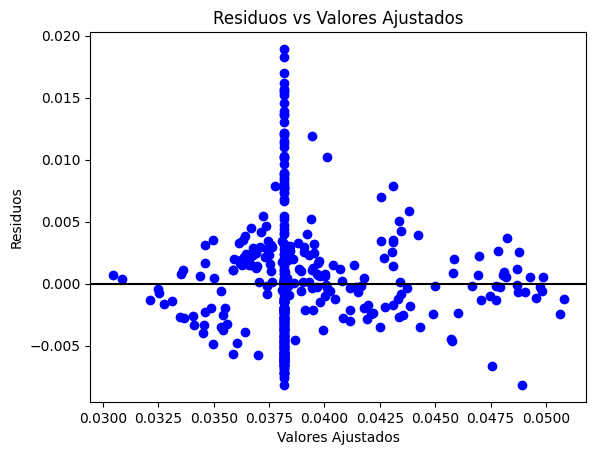

In [ ]:
# Se obtienen los residuos del modelo de regresión
residuos_modelo = modelo.resid

# Gráfica de residuos vs valores ajustados
plt.scatter(modelo.fittedvalues, residuos_modelo, c='blue')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()


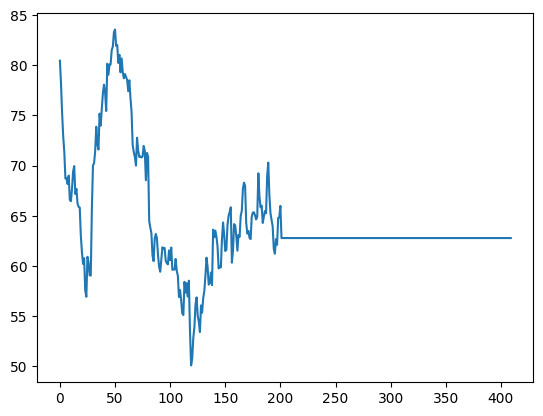

In [ ]:
from scipy.stats import norm

# Nivel de confianza para el cálculo del VaR
nivel_confianza = 0.95

# Valor de la inversión y lista para almacenar los resultados del VaR
monto_inversion = 1000
VaR = []

# Calcular el valor Z correspondiente al nivel de confianza
z_score = norm.ppf(nivel_confianza)

# Calcular el VaR para cada predicción de volatilidad
for i in range(len(volatilidad_predicha)):
    # Calcular el VaR
    var = monto_inversion * z_score * volatilidad_predicha[i]
    VaR.append(var)

# Crear un array de los datos de Tesla excluyendo la primera fila
datos_Tesla = datos_Tesla[1:].to_numpy()

# Graficar el VaR
plt.plot(VaR)
plt.show()


En general, el código realiza un análisis completo de datos financieros, modela la volatilidad, ajusta un modelo de regresión, analiza los residuos y calcula el *VaR*, proporcionando información valiosa para la toma de decisiones en el ámbito financiero.


# Proyecto: Optimización Algoritmica *(Markowitz)*
#### Rodrigo Alvarez Gaspar - 201895

El modelo de Markowitz en este contexto se utiliza para encontrar una cartera eficiente que maximice la relación rendimiento-riesgo, considerando la variabilidad histórica de los activos y cómo se pueden combinar para obtener un rendimiento óptimo dado un nivel de riesgo. La optimización busca asignar pesos a los activos de manera que se logre el mejor equilibrio posible entre el rendimiento esperado y la volatilidad (riesgo) de la cartera. La cartera óptima se define como aquella que ofrece el mejor índice de Sharpe, que es una medida de la rentabilidad ajustada al riesgo.

**Documentación:**

1. **Importación de librerías:** Importa las librerías pandas, numpy, matplotlib, scipy.optimize y yfinance para el manejo de datos, cálculos numéricos, visualización y descarga de datos financieros, respectivamente.

2. **Descarga de datos:** Descarga los precios ajustados de cierre de los activos seleccionados (TSLA, HD, V, AAPL) desde el 1 de enero de 2020 hasta el 1 de enero de 2023.

4. **Simulación de Monte Carlo:** Genera 10,000 carteras con pesos aleatorios para los activos seleccionados y calcula sus rendimientos y volatilidades.

5. **Funciones de estadísticas de cartera:** Define una función para calcular las estadísticas de una cartera, incluyendo rendimiento, volatilidad y ratio de Sharpe.

6. **Optimización de la cartera:** Utiliza la optimización con restricciones para encontrar la cartera óptima que maximiza el índice de Sharpe.

7. **Impresión de resultados:** Imprime los pesos óptimos de la cartera, el rendimiento, la volatilidad y el índice de Sharpe de la cartera óptima.

8. **Gráfico de dispersión:** Grafica el conjunto de carteras en un gráfico de dispersión, resaltando la cartera óptima en rojo. La escala de colores en el gráfico indica el índice de Sharpe de cada cartera.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Pesos optimos de la cartera:  [('TSLA', 56.288000000000004), ('HD', 29.275000000000002), ('V', 0.0), ('AAPL', 28.348000000000003)]
Retorno óptimo de la cartera:  36.984
Volatilidad optima de la cartera:  52.358
Sharpe óptimo de la cartera:  0.706


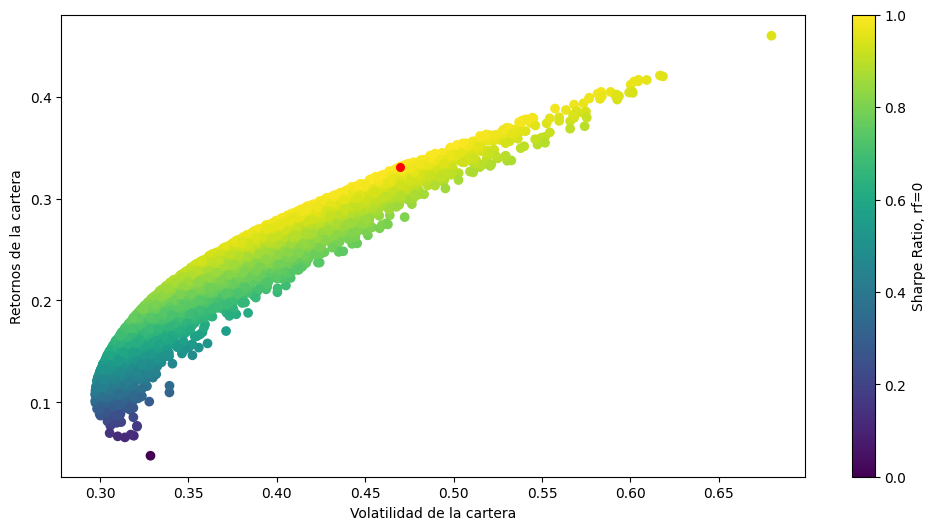

In [ ]:
# Importando las librerias necesarias para este proyecto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import yfinance as yf

V = yf.Ticker('V')
HD = yf.Ticker('HD')
TSLA = yf.Ticker('TSLA')
AAPL = yf.Ticker('AAPL')

# Descargamos los datos
assets = ['TSLA', 'HD', 'V', 'AAPL']
data = pd.DataFrame()

for t in assets:
    data[t] = yf.download(t, start='2020-01-01', end='2023-01-01')['Adj Close']

log_returns = np.log(1 + data.pct_change())

port_returns = []
port_vols = []

for i in range(10000):
    num_assets = len(assets)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.sum(weights * log_returns.mean()) * 252)
    port_vols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))

port_returns = np.array(port_returns)
port_vols = np.array(port_vols)

def portfolio_stats(weights, log_returns):
    port_returns = np.sum(weights * log_returns.mean()) * 252
    port_vols = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe = port_returns / port_vols
    return {'Return': port_returns, 'Volatility': port_vols, 'Sharpe': sharpe}


sharpe = port_returns / port_vols
max_sr_returns = port_returns[sharpe.argmax()]
max_sr_volatility = port_vols[sharpe.argmax()]

def minimize_sharpe(weights, log_returns):
    return -portfolio_stats(weights, log_returns)['Sharpe']

initializer = num_assets * [1. / num_assets, ]
bounds = tuple([(0, 1)] * num_assets)

optimal_sharpe = optimize.minimize(minimize_sharpe, initializer, method = 'SLSQP', args=(log_returns,), bounds = bounds)
optimal_sharpe_weights = optimal_sharpe['x'].round(5)
optimal_stats = portfolio_stats(optimal_sharpe_weights, log_returns)

print("Pesos optimos de la cartera: ", list(zip(assets, list(optimal_sharpe_weights*100))))
print("Retorno óptimo de la cartera: ", np.round(optimal_stats['Return']*100,3))
print("Volatilidad optima de la cartera: ", np.round(optimal_stats['Volatility']*100,3))
print("Sharpe óptimo de la cartera: ", np.round(optimal_stats['Sharpe'],3))


plt.figure(figsize=(12,6))
plt.scatter(port_vols, port_returns, c=(port_returns/port_vols))
plt.scatter(max_sr_volatility,max_sr_returns, c="red", s=30)
plt.colorbar(label="Sharpe Ratio, rf=0")
plt.xlabel("Volatilidad de la cartera")
plt.ylabel("Retornos de la cartera")
plt.show()